# Projet de Machine Learning

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd

In [5]:
path    = ''
data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

### Question 1

In [6]:
# Here we show the first five lines of the data
data.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

In [7]:
# Changing the type of qualitative variables into factors
data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True)
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density.n.P.Km2.'].str.replace(',', '.'))
#data['Density.n.P.Km2.'] = pd.to_numeric(data['Density\\n(P/Km2)'])

In [8]:
list(data.columns)

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

### Question 2

In [9]:
loading_missing_value = data.isna().sum().sort_values(ascending=False)

#print(loading_missing_value)
print('Number of missing values = ', loading_missing_value.sum())

Number of missing values =  6978


In [10]:
print("Are there no duplicates in Loading? : ",data.duplicated().sum()==0)

Are there no duplicates in Loading? :  True


In [11]:
# Check which columns have missing values
isna_list = []
for col_name in data.columns:
    isna_list.append([col_name, data[col_name].isna().sum()])
isna_array = np.array(isna_list)

sorted_i = np.argsort(isna_array[:, 1].astype(int))[::-1]
sorted_i_array = isna_array[sorted_i]

print(sorted_i_array)

[['Renewables (% equivalent primary energy)' '2137']
 ['Financial flows to developing countries (US $)' '2089']
 ['Renewable-electricity-generating-capacity-per-capita' '931']
 ['Value_co2_emissions_kt_by_country' '428']
 ['gdp_growth' '317']
 ['gdp_per_capita' '282']
 ['Energy intensity level of primary energy (MJ/$2017 PPP GDP)' '207']
 ['Renewable energy share in the total final energy consumption (%)'
  '194']
 ['Access to clean fuels for cooking' '169']
 ['Electricity from nuclear (TWh)' '126']
 ['Low-carbon electricity (% electricity)' '42']
 ['Electricity from renewables (TWh)' '21']
 ['Electricity from fossil fuels (TWh)' '21']
 ['Access to electricity (% of population)' '10']
 ['Longitude' '1']
 ['Latitude' '1']
 ['Density.n.P.Km2.' '1']
 ['Land Area(Km2)' '1']
 ['Primary energy consumption per capita (kWh/person)' '0']
 ['Year' '0']
 ['Entity' '0']]


**Many variables are have a big nuber of NA values in the current dataset, we therefore delete the following variables from the dataset:**

* Renewable-electricity-generating-capacity-per-capitacapitacapitacapita

* Financial flows to developing countries (US Dollars)

* Renewables (% equivalent primary energy).



In [12]:
columns_to_remove = ["Financial flows to developing countries (US $)",
                     "Renewable-electricity-generating-capacity-per-capita",
                     "Renewables (% equivalent primary energy)"]

data = pd.read_csv(path + "global-data-on-sustainable-energy (1).csv")

data['Entity'] = data['Entity'].astype('category')
data['Year'] = data['Year'].astype('category')
data.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True)
data['Density.n.P.Km2.'] = pd.to_numeric(data['Density.n.P.Km2.'].str.replace(',', '.'))

data = data.drop(columns=columns_to_remove)

print(data.head())

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4            

### Question 3

In [13]:
original_dimensions = data.shape

data_complete = data.dropna()

# Afficher les dimensions du DataFrame original et du nouveau
print("Original Dimensions:", original_dimensions)
print("New Dimensions:", data_complete.shape)

# Mettre à jour le DataFrame d'origine avec le DataFrame des cas complets
data = data_complete.copy()

data = data.reset_index()

Original Dimensions: (3649, 18)
New Dimensions: (2868, 18)


### Question 4

We begin by unidimentional descriptive analysis of the data. Looking at the qualitative variables: Entity and Year, what is noticable is that not every country has data from all the years between 2000 and 2020. To discover what countries are affected, we will do a barplot of all the countries that is missing at least a year.

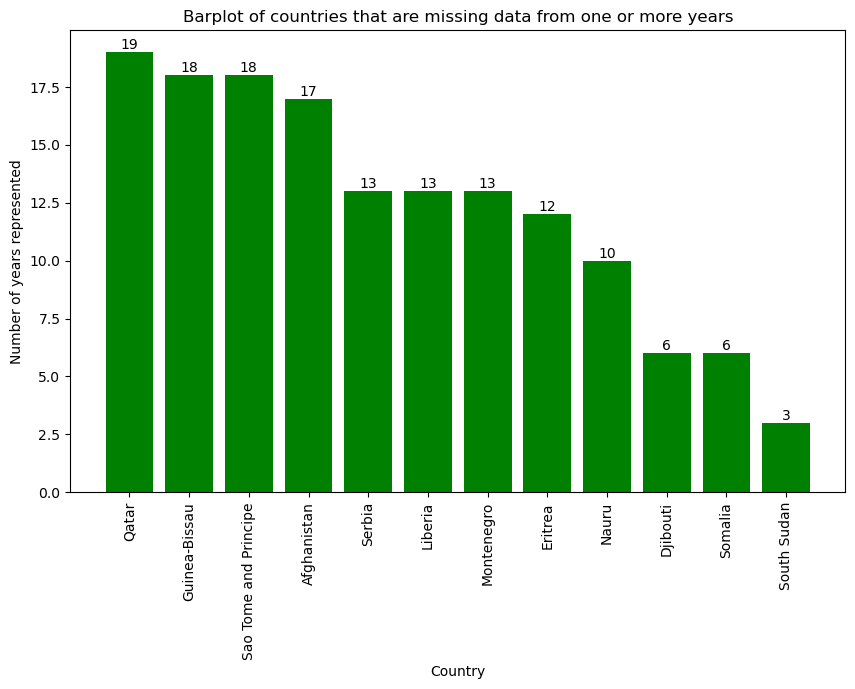

In [14]:
# Calculate entity counts
entity_counts = data['Entity'].value_counts()

# Set the threshold
appearance_threshold = 20

# Get entities with count not equal to the threshold
filtered_entities = entity_counts[~entity_counts.isin([0, appearance_threshold])].index.tolist()

# Filter data for entities with count not equal to the threshold
filtered_data = data[data['Entity'].isin(filtered_entities)]

# Create a table of frequencies for the 'Entity' column in the filtered data
entity_table = filtered_data['Entity'].value_counts()

# Filter entity_table to include only the counts corresponding to filtered entities
entity_table = entity_table[filtered_entities]

# Create a barplot for the table of frequencies with rotated x-axis labels
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(filtered_entities, entity_table, color="green")
plt.title("Barplot of countries that are missing data from one or more years")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Country")
plt.ylabel("Number of years represented")

# Add counts as text labels on each bar
for i, count in enumerate(entity_table):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

plt.show()

Here, we notice that there are 12 countries (out of 176) thar are missing data from certain years. The country missing the most data is South Sudan with only 3 observations, whereas Quatar is only missing one obesrvation.

Now, we will look at the **quantitative** variables. Starting by plotting the histograms of the first three variables.

In [15]:
#Transformation of variables
#WARNING: Only run ONCE!!
data['Access to electricity (% of population)'] = np.sqrt(data['Access to electricity (% of population)'])
data["Access to clean fuels for cooking"] = np.sqrt(data["Access to clean fuels for cooking"])
data['Electricity from fossil fuels (TWh)'] = np.sqrt(data['Electricity from fossil fuels (TWh)'])
data["Electricity from nuclear (TWh)"] = np.sqrt(data["Electricity from nuclear (TWh)"])
data["Electricity from renewables (TWh)"] = np.sqrt(data["Electricity from renewables (TWh)"])
data["Value_co2_emissions_kt_by_country"] = np.log(data["Value_co2_emissions_kt_by_country"])
#data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"] = np.log(data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"])
data["Primary energy consumption per capita (kWh/person)"] = np.log(data["Primary energy consumption per capita (kWh/person)"])
data["gdp_per_capita"] = np.log(data["gdp_per_capita"])
data["Land Area(Km2)"] = np.log(data["Land Area(Km2)"])

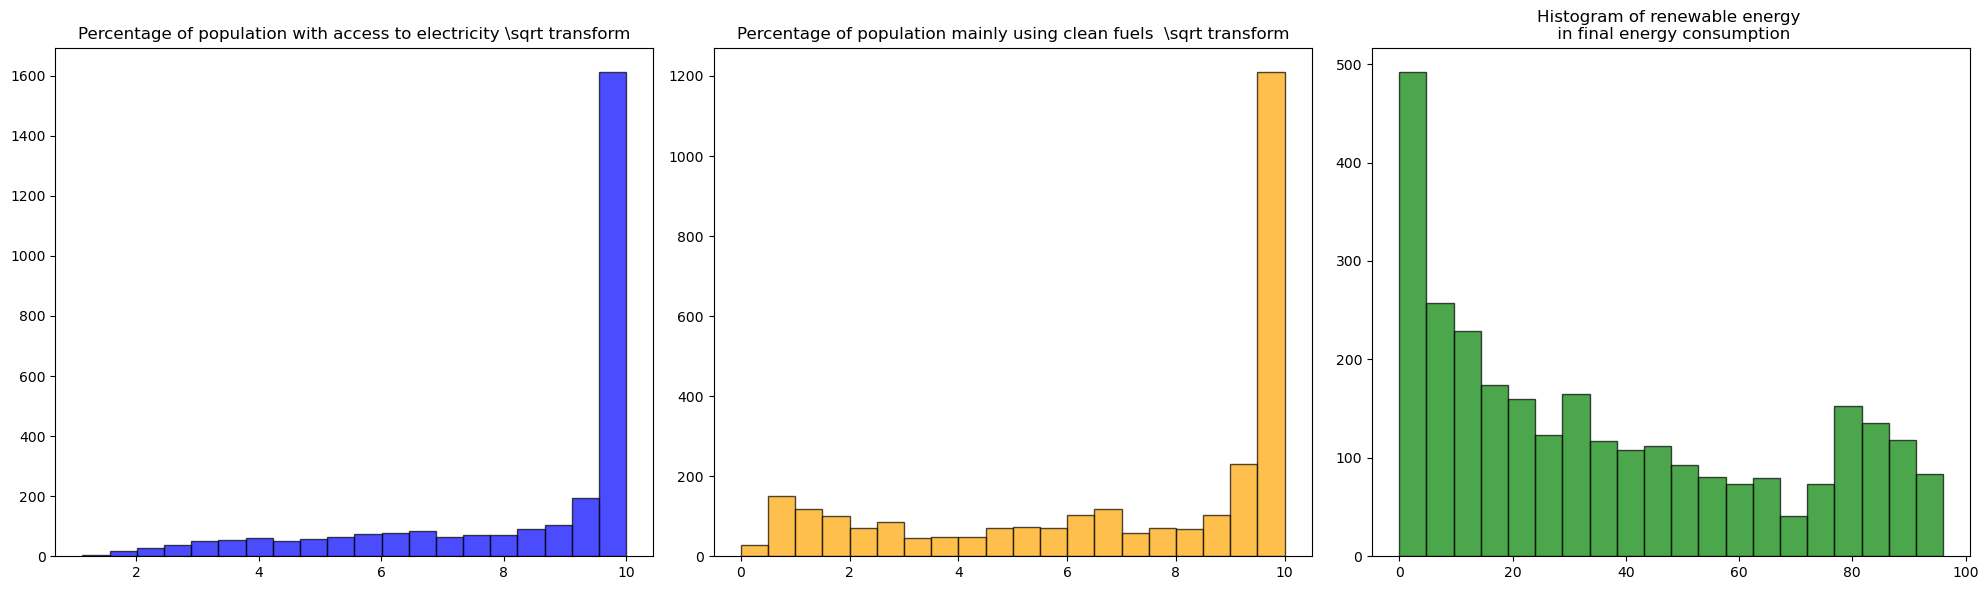

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot the histograms for each column in separate subplots
axs[0].hist(data['Access to electricity (% of population)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Percentage of population with access to electricity \sqrt transform')

axs[1].hist(data["Access to clean fuels for cooking"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Percentage of population mainly using clean fuels  \sqrt transform')

axs[2].hist(data["Renewable energy share in the total final energy consumption (%)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Histogram of renewable energy \n in final energy consumption')

plt.tight_layout()
plt.show()

This shows us that most places, a 100% of the population has access to electricity. This is almost the case for usage of clean fuels, but a larger part of the world has 0% access to clean fuels. When it comes to renewable energy in final energy consumption, most have 0%, but the people who have more than that is more or less evenly distributed between 0 and 95%. On average, the percentage of renewable energy consumption is 35%. 

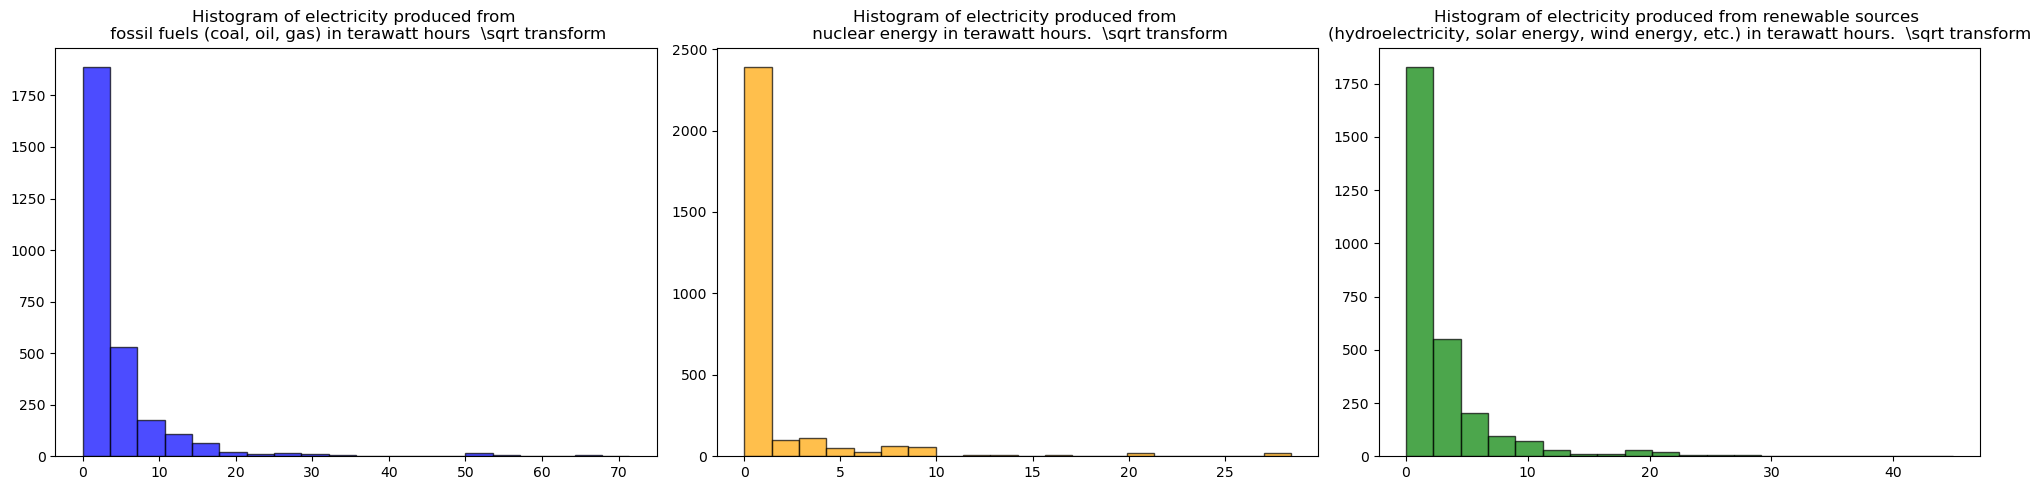

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the histograms for each column in separate subplots
axs[0].hist(data['Electricity from fossil fuels (TWh)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Histogram of electricity produced from \n fossil fuels (coal, oil, gas) in terawatt hours  \sqrt transform')

axs[1].hist(data["Electricity from nuclear (TWh)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1].set_title('Histogram of electricity produced from \n nuclear energy in terawatt hours.  \sqrt transform')

axs[2].hist(data["Electricity from renewables (TWh)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title('Histogram of electricity produced from renewable sources \n(hydroelectricity, solar energy, wind energy, etc.) in terawatt hours.  \sqrt transform')

# Uncomment and add more subplots if needed for other columns

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

With the next three variables, we have transformed the variables using a square root-tranformation. There is high frequancy of the lowest level of energy production, which is logical as not all countries produce a lot of electricity. 

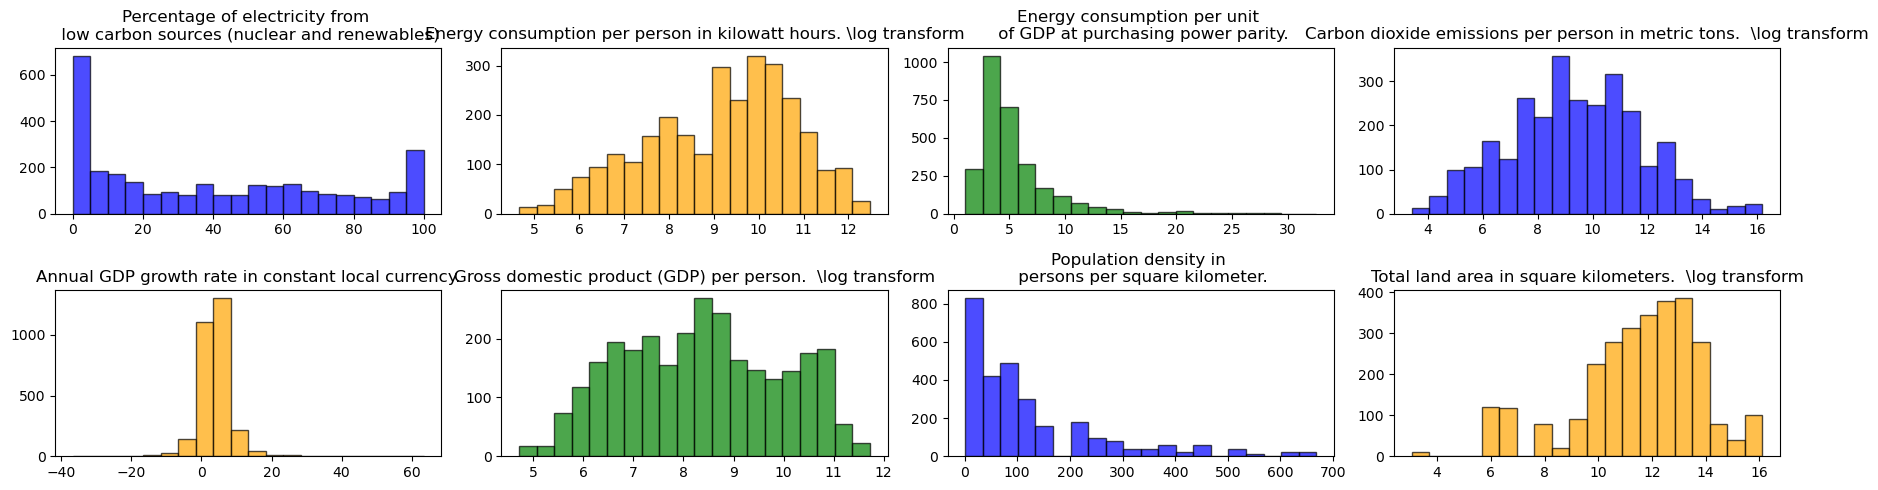

In [18]:
fig, axs = plt.subplots(2, 4, figsize=(18, 5))

# Plotting of the histograms for each column in separate subplots
axs[0][0].hist(data['Low-carbon electricity (% electricity)'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][0].set_title('Percentage of electricity from \n low carbon sources (nuclear and renewables)')

axs[0][1].hist(data["Primary energy consumption per capita (kWh/person)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[0][1].set_title('Energy consumption per person in kilowatt hours. \log transform')

axs[0][2].hist(data["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[0][2].set_title('Energy consumption per unit \n of GDP at purchasing power parity.')

axs[0][3].hist(data["Value_co2_emissions_kt_by_country"], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][3].set_title('Carbon dioxide emissions per person in metric tons.  \log transform')

axs[1][0].hist(data["gdp_growth"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][0].set_title('Annual GDP growth rate in constant local currency.')

axs[1][1].hist(data["gdp_per_capita"], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[1][1].set_title('Gross domestic product (GDP) per person.  \log transform')

axs[1][2].hist(data['Density.n.P.Km2.'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[1][2].set_title('Population density in \n persons per square kilometer.')

axs[1][3].hist(data["Land Area(Km2)"], bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[1][3].set_title('Total land area in square kilometers.  \log transform')

plt.tight_layout()
plt.show()

Among the remaining variables, we also chose to log-tranform the $CO_2$ emissions per person, energy consumption per person in Kwh, GDP per person and total land area in km². From the descriptive analysis, we can interperet that: 
- It is common to have 0% electivity coming from low carbon sources, but the amount of places where that percentage is 100% is far from negligible. 
- Most people consume between $e⁹ - e^{11}$ = 8000-60000 kWh of energy per year
- The energy consumption per unit of GDP is centered around 4 Kwh per unit of GPP
- The most common carbon dioxide emission per person is e⁸ = 2980 metric tonnes per year
- The annual GDP growth rate is normally around 0-5%
- GDP per person is centered around e⁸ = 2980
- Most places have a very low population density

### Question 5

In [19]:
# co2_pays_annees

In [20]:
co2_pays_annees = {}
country = ""
tot = 0
for i in range(data.shape[0]):
    if data["Entity"][i] == country:
        tot += data["Value_co2_emissions_kt_by_country"][i]
    else:
        co2_pays_annees[country] = tot
        country = data["Entity"][i]
        tot = 0
        
del co2_pays_annees[""]

biggest = []
temp = co2_pays_annees
for i in range(5):
    big = max(temp, key=co2_pays_annees.get)
    biggest.append(big)
    del temp[big]
    
print(biggest)
    
df_co2_pays_annees = pd.DataFrame({'country':co2_pays_annees.keys(), 'co2 emission':co2_pays_annees.values()})


['China', 'United States', 'India', 'Japan', 'Germany']


In [21]:
df_co2_pays_annees.plot.bar(y = "co2 emission", x = "country", figsize=(500, 100), color = ['red', 'blue'])

<Axes: xlabel='country'>

### Question 6

## Analyse descriptive multidimensionnelle

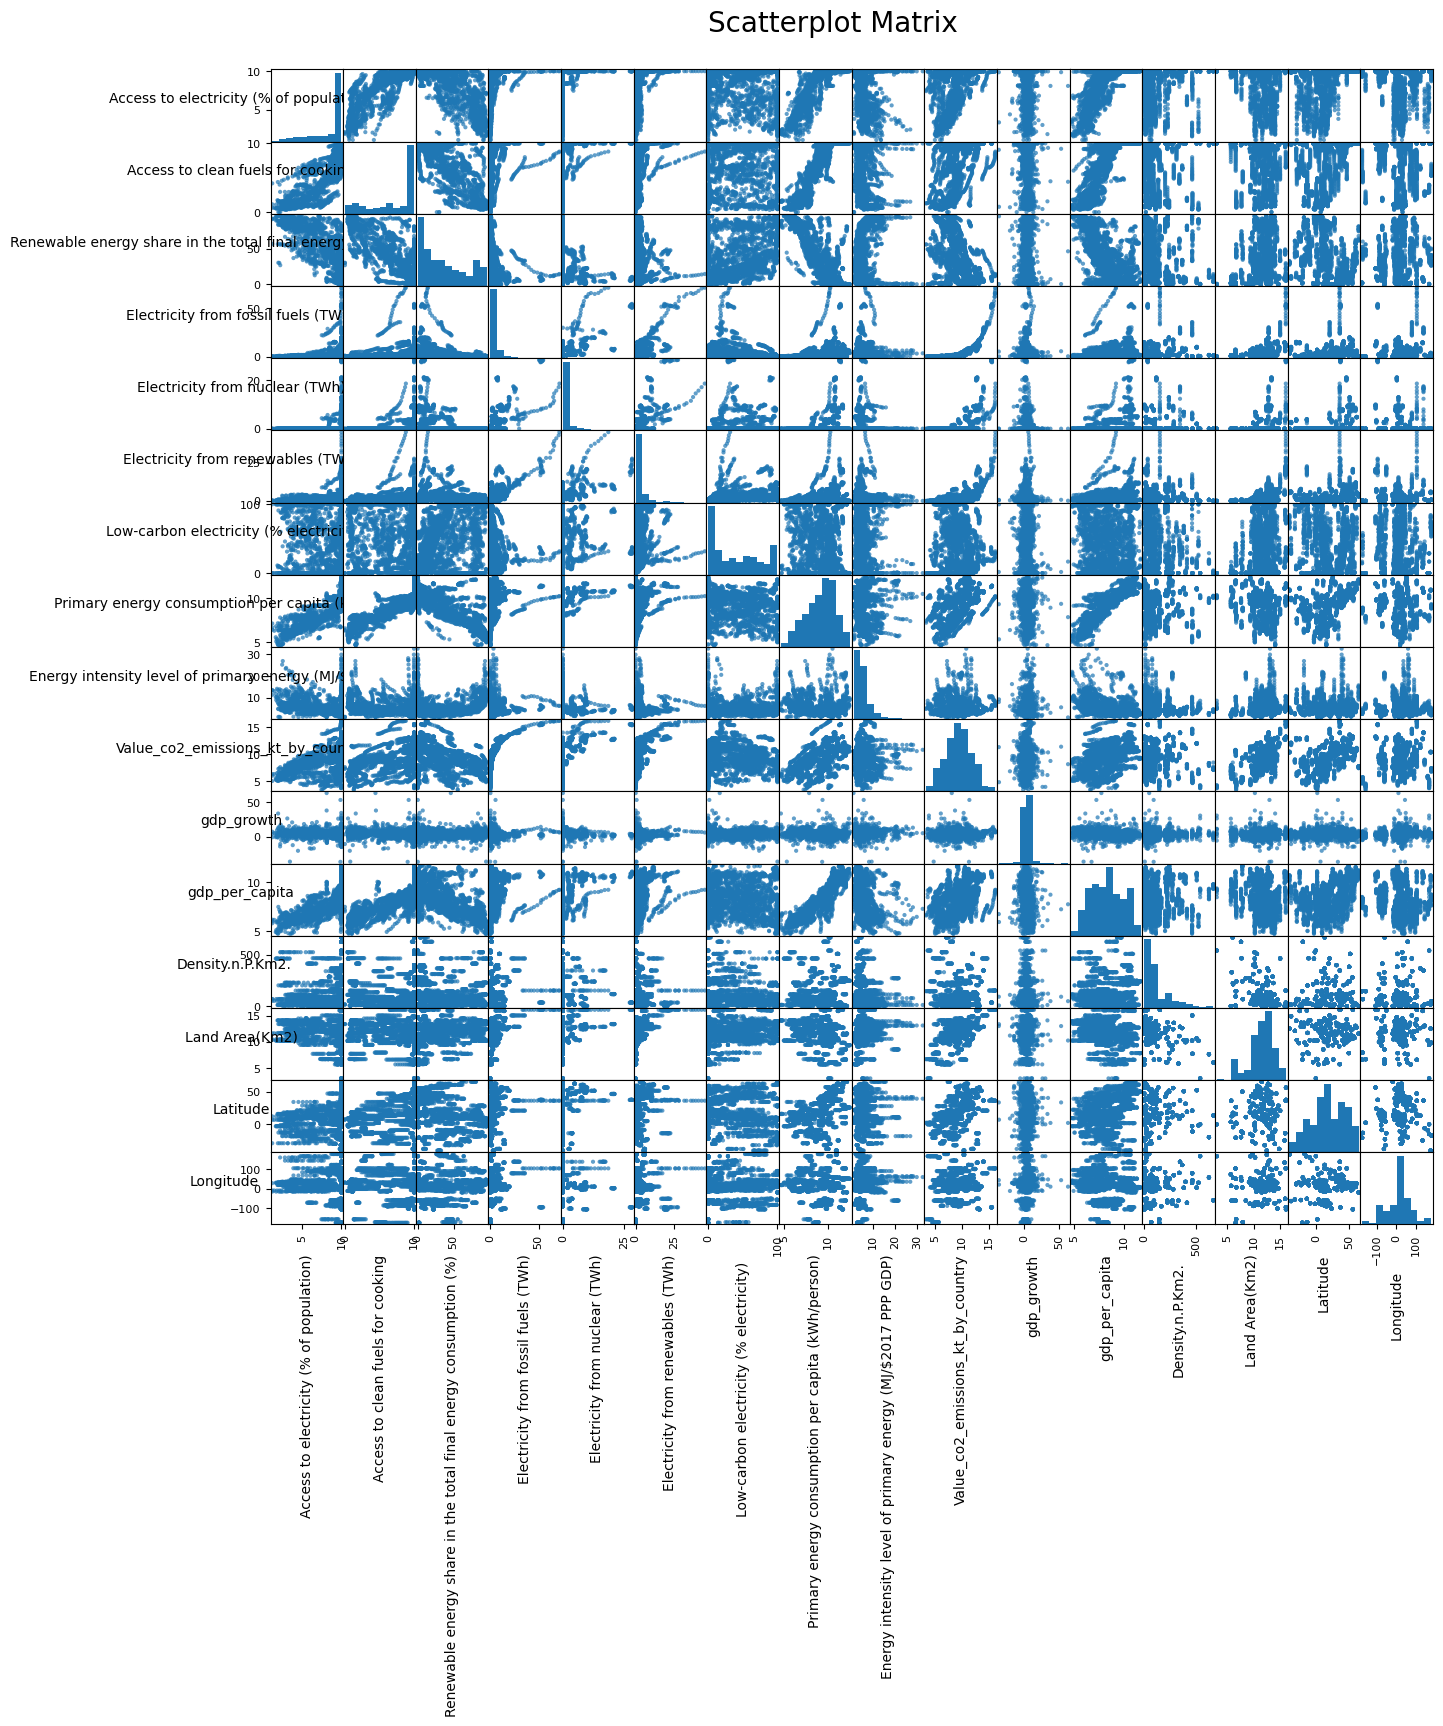

In [22]:
scatter_matrix =pd.plotting.scatter_matrix(data.iloc[:, 2:], figsize=(15, 15), alpha=0.7)
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation('horizontal')
    #ax.yaxis.label.set_va('center')
plt.suptitle("Scatterplot Matrix", y=0.92, fontsize=20)
plt.show()

# enlever land Area, latidtude et longitude ??

/var/folders/mc/hgx900796g9_g2f8hn1fcfqh0000gn/T/ipykernel_24843/2937997379.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_data.corr()


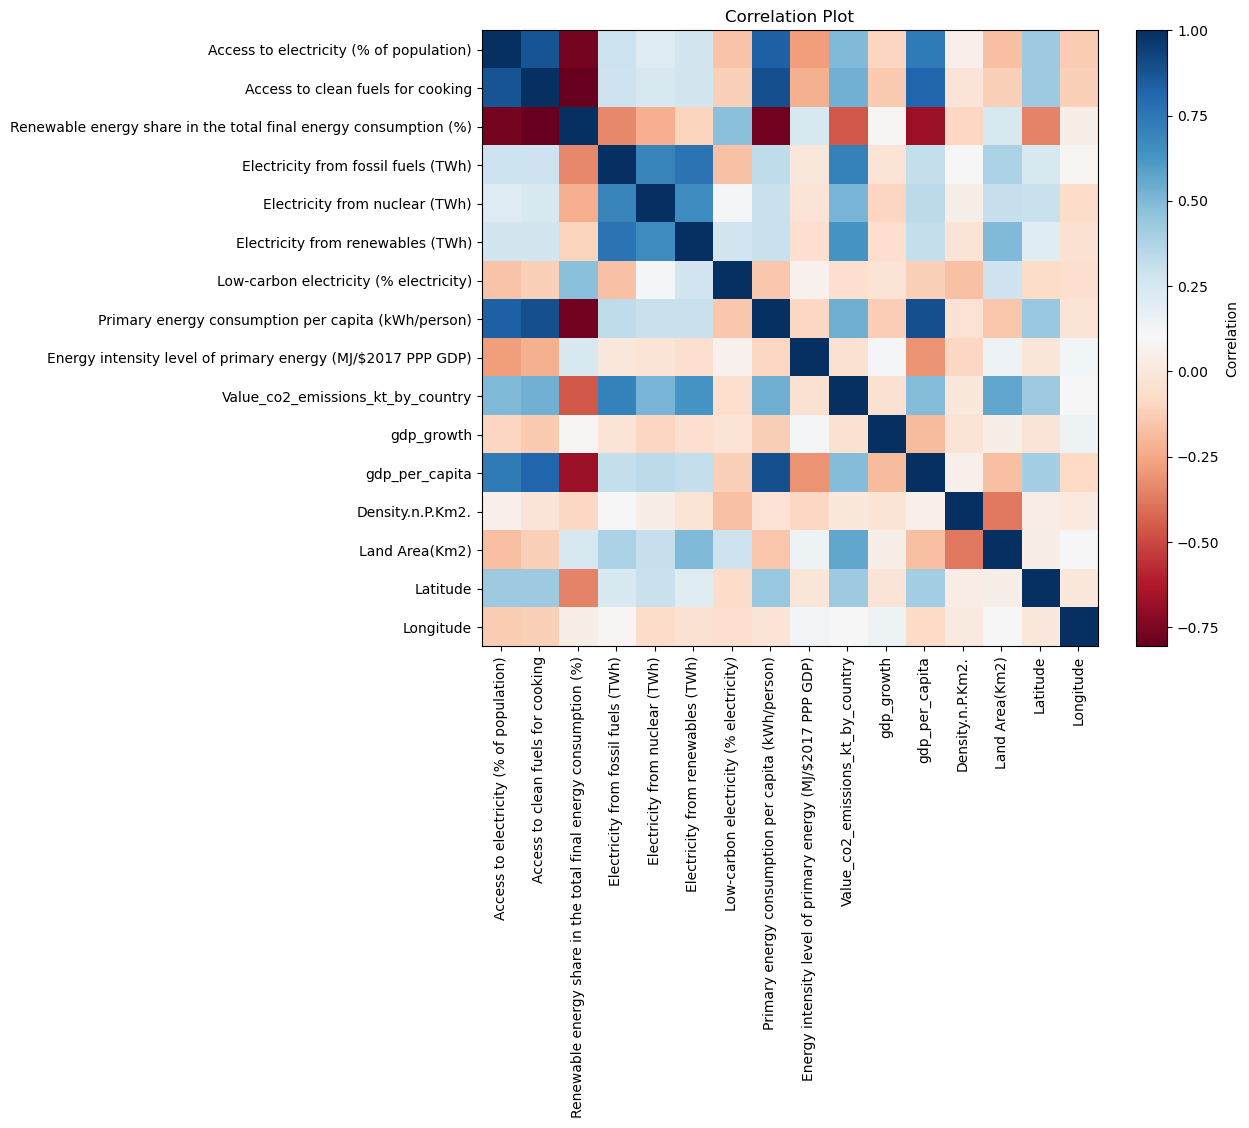

In [23]:
clean_data = data.iloc[:, 2:].dropna()

corr = clean_data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='RdBu', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Plot')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

### Question 7



The following commands perform a Principal Component Analysis (PCA) on quantitative variables.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Selection of quantitative variables
data_quantitative = data_complete.select_dtypes(include='number')

# réduction des variables
X=scale(data_quantitative)

# ACP on quantitative variables
pca = PCA()
C = pca.fit(X).transform(X)

# Create a DataFrame with the first 10 eigenvalues and their cumulative percentage of variance
eigenvalues_df = pd.DataFrame({
    'Eigenvalues': pca.explained_variance_[:10],
    'Cumulative Variance (%)': pca.explained_variance_ratio_[:10].cumsum() * 100
})

# Display the DataFrame
print("Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:")
print(eigenvalues_df)

Table with the first 10 eigenvalues and their Cumulative Percentage of Variance:
   Eigenvalues  Cumulative Variance (%)
0     4.497847                28.101740
1     3.205793                48.130958
2     1.373984                56.715364
3     1.325275                64.995445
4     1.037927                71.480226
5     0.908151                77.154194
6     0.851153                82.472048
7     0.726137                87.008820
8     0.640907                91.013090
9     0.527988                94.311864


We observe a cumulative percentage of variance of 90.917527 corrisponding to 9 eigenvalues. Then, we will keep 9 dimensions as 90.917527% > 85%.

The next plot shows the percentage of explained variance corresponding to each dimension.

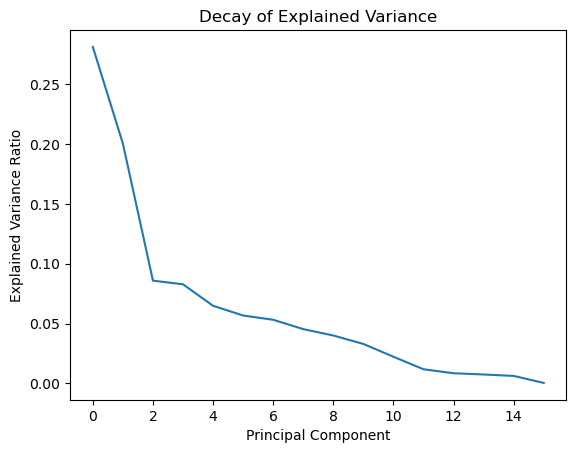

In [25]:
# Decay of Explained Variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Decay of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Show the plot
plt.show()

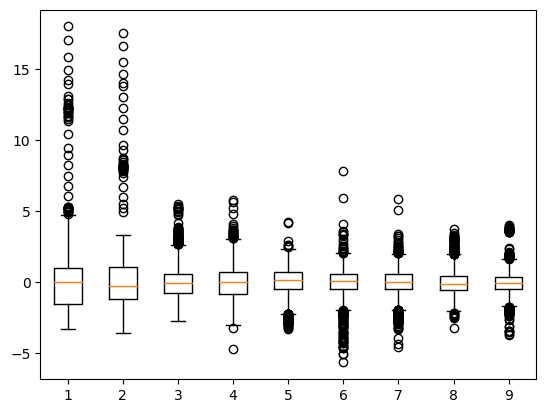

In [26]:
# Boxplots for individual coordinates
plt.boxplot(C[:,0:9])
plt.show()

In [27]:
# Correlation matrix between variables and dimensions 
#
#
#
#
#
#

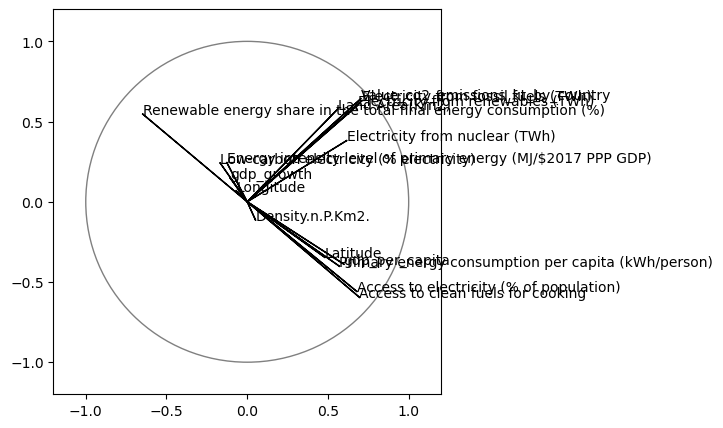

In [28]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 2
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

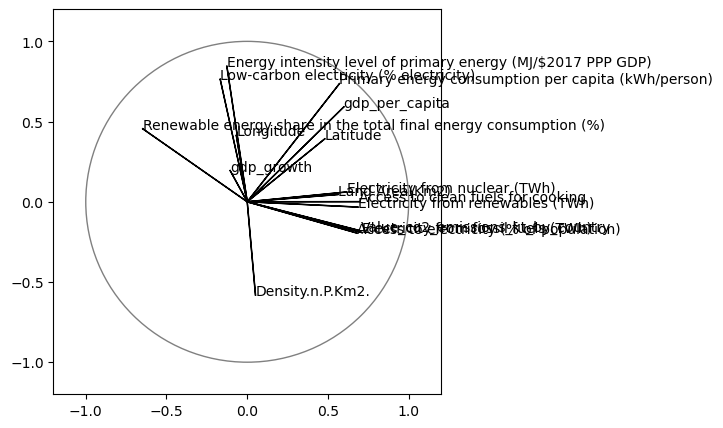

In [29]:
# Projection of Variables onto the Factorial Plane Composed of Dimensions 1 and 3
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_quantitative.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

### Question 8

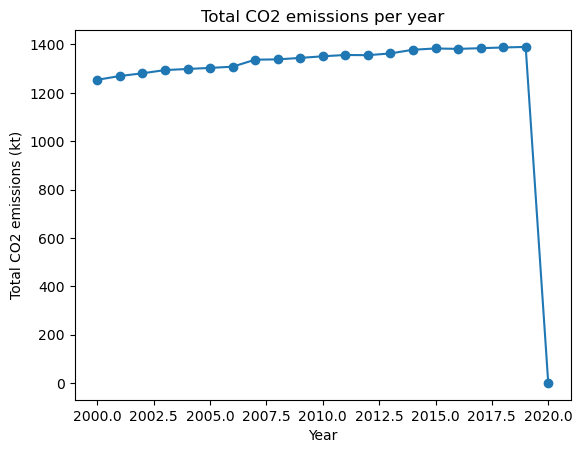

In [30]:
# Grouping the data by year and sum the CO2 emissions
sum_co2_by_year = data.groupby('Year')['Value_co2_emissions_kt_by_country'].sum()

plt.plot(sum_co2_by_year.index, sum_co2_by_year.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Total CO2 emissions (kt)')
plt.title('Total CO2 emissions per year')
plt.show()


In [31]:
data['Year'].corr(data['Value_co2_emissions_kt_by_country'])

0.04714462835017534

In [32]:
from sklearn.linear_model import LinearRegression

X = data[['Year']] 
y = data['Value_co2_emissions_kt_by_country']
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Score:",  model.score(X, y))

Intercept: -29.96291057917871
Score: 0.0022226159822762437


# Modelisation
In this section we are predicting the Value-co2-emissions variable using different regression and classifictaion methods.

### Question 1

In [33]:
# Checking if all missing values are removed: 
data.isna().sum().sum()

0

Splitting the dataset

In [34]:
# Qualitative data transformed to dummies 
dataDum=pd.get_dummies(data[["Entity","Year"]], drop_first=True)

# Quantitaive data 
dataQuant=data[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]
dfC=pd.concat([dataDum,dataQuant],axis=1)
dfC.head()

Entity_Albania  Entity_Algeria  Entity_Angola  Entity_Antigua and Barbuda  \
0               0               0              0                           0   
1               0               0              0                           0   
2               0               0              0                           0   
3               0               0              0                           0   
4               0               0              0                           0   

   Entity_Argentina  Entity_Armenia  Entity_Aruba  Entity_Australia  \
0                 0               0             0                 0   
1                 0               0             0                 0   
2                 0               0             0                 0   
3                 0               0             0                 0   
4                 0               0             0                 0   

   Entity_Austria  Entity_Azerbaijan  ...  \
0               0                  0  ...   
1               0                  0  ...   
2               0                  0  ...   
3               0                  0  ...   
4               0                  0  ...   

   Low-carbon electricity (% electricity)  \
0                               67.021280   
1                               62.921350   
2                               63.440857   
3                               76.190475   
4                               78.947370   

   Primary energy consumption per capita (kWh/person)  \
0                                           5.437941    
1                                           5.319253    
2                                           5.529703    
3                                           5.718411    
4                                           5.870087    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.40             
1                                               1.20             
2                                               1.41             
3                                               1.50             
4                                               1.53             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                           7.106606    8.832278        5.250617   
1                           6.937314    1.414118        5.353667   
2                           7.346010   11.229715        5.489067   
3                           7.473069    5.357403        5.574940   
4                           7.478735   13.826320        5.885251   

   Density.n.P.Km2.  Land Area(Km2)  Latitude  Longitude  
0              60.0       13.388153  33.93911  67.709953  
1              60.0       13.388153  33.93911  67.709953  
2              60.0       13.388153  33.93911  67.709953  
3              60.0       13.388153  33.93911  67.709953  
4              60.0       13.388153  33.93911  67.709953  

[5 rows x 211 columns]

Defining the two training/testing sets

In [35]:
# binary variable to explain 
Yb=data["Value_co2_emissions_kt_by_country"].map(lambda x: int(x))
# real variable to explain
Yr=data["Value_co2_emissions_kt_by_country"]

In [36]:
from sklearn.model_selection import train_test_split

# Splitting innto test and training sets, with the test set beeing 20% of the data 

X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=0.2,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=0.2,random_state=11)

Why is this step necessary when we’re focusing on algorithm performance? ------------

Standardization of data using StandardScaler

In [37]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  

Xr_train = scaler.transform(X_train)  
Xr_test = scaler.transform(X_test)

### Question 2

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV

* endre cv ? 
* legge inn prediction tester
* sjekke params og cv

#### Linear models

legge inn linear regression model with/without variable selection
- without - covarianse analyse 
- with - lasso

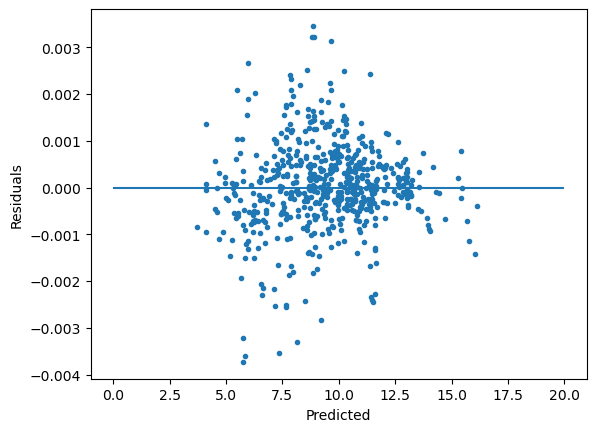

In [63]:
lr_model = LinearRegression()
lr_model.fit(Xr_train, Yr_train)
lr_pred = lr_model.predict(Xr_test)
lr_mse = mean_squared_error(Yr_test, lr_pred)
lr_r2 = r2_score(Yr_test, lr_pred)

lr_params = [{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}] #{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(Ridge(), param_grid=lr_params, cv=5)
lr_grid_opt =lr_grid.fit(Xr_train, Yr_train)
best_lr_model = lr_grid_opt.best_estimator_
best_lr_pred = best_lr_model.predict(Xr_test)
best_lr_mse = mean_squared_error(Yr_test, best_lr_pred)
best_lr_r2 = r2_score(Yr_test, best_lr_pred)

plt.plot(best_lr_pred,Yr_test-best_lr_pred,".")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

#from pingouin import ancova
#ancova_data = pd.DataFrame(Xr_test.copy())
#ancova_data['lr_pred'] = pd.Series(lr_pred) #, index=ancova_data.index)  # Create a Series from predictions
#ancova_data['Yr_pred'] = lr_pred

#ancova_results = ancova(data=ancova_data, dv='lr_pred', covar='Value_co2_emissions_kt_by_country')
#print(ancova_results)


Ridge MSE:  0.00024047172709448165
Ridge R2:  0.9999548251429027
Best Ridge MSE:  9.131370485978729e-07
Best Ridge R2:  0.9999998284586875
0.05


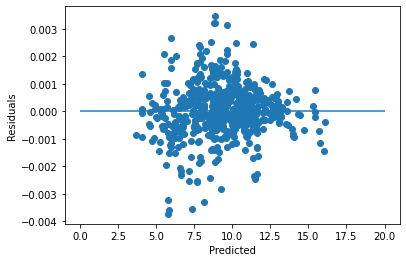

Lasso MSE:  0.924347070373782
Lasso R2:  0.8263527803579926
Best Lasso MSE:  0.002310867675934437
Best Lasso R2:  0.999565881950895
0.05


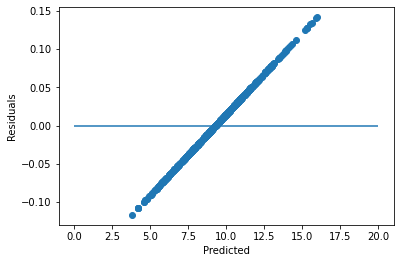

In [ ]:
# Regularized linear regression models with parameter tuning

# Using Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(Xr_train, Yr_train)
ridge_pred = ridge_model.predict(Xr_test)
ridge_mse = mean_squared_error(Yr_test, ridge_pred)
ridge_r2 = r2_score(Yr_test, ridge_pred)

print("Ridge MSE: ", ridge_mse)
print("Ridge R2: ", ridge_r2)

#Ridge with cross validation
ridge_params = [{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}] #{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5)
ridge_grid_opt =ridge_grid.fit(Xr_train, Yr_train)
best_ridge_model = ridge_grid_opt.best_estimator_
best_ridge_pred = best_ridge_model.predict(Xr_test)
best_ridge_mse = mean_squared_error(Yr_test, best_ridge_pred)
best_ridge_r2 = r2_score(Yr_test, best_ridge_pred)

print("Best Ridge MSE: ", best_ridge_mse)
print("Best Ridge R2: ", best_ridge_r2)
print(ridge_grid_opt.best_params_["alpha"])

plt.plot(best_ridge_pred,Yr_test-best_ridge_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

#Using Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(Xr_train, Yr_train)
lasso_pred = lasso_model.predict(Xr_test)
lasso_mse = mean_squared_error(Yr_test, lasso_pred)
lasso_r2 = r2_score(Yr_test, lasso_pred)

print("Lasso MSE: ", lasso_mse)
print("Lasso R2: ", lasso_r2)

#Ridge with cross validation
lasso_params = [{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}] #{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5)
lasso_grid_opt=lasso_grid.fit(Xr_train, Yr_train)
best_lasso_model = lasso_grid_opt.best_estimator_
best_lasso_pred = best_lasso_model.predict(Xr_test)
best_lasso_mse = mean_squared_error(Yr_test, best_lasso_pred)
best_lasso_r2 = r2_score(Yr_test, best_lasso_pred)

print("Best Lasso MSE: ", best_lasso_mse)
print("Best Lasso R2: ", best_lasso_r2)
print(lasso_grid_opt.best_params_["alpha"])

plt.plot(best_lasso_pred,Yr_test-best_lasso_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()


In [ ]:
# Coefficients
regLasso=Lasso(alpha=lasso_grid_opt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_

array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.  

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 1 variables et en supprime 210


In [ ]:
imp_coef = coef[coef != 0].sort_values()
print("Lasso model coefficients: ")
print(imp_coef)

Lasso model coefficients: 
Value_co2_emissions_kt_by_country    2.352912
dtype: float64


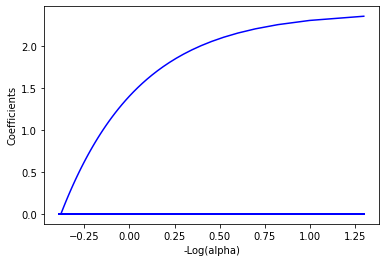

In [ ]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xr_train,Yr_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

#### Logistic regression

In [ ]:
# Logistsic regression with cross validation
logit_params = [{"C":[1,1.2,1.5,1.7,2,3,4]}]
logit_grid = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), logit_params,cv=5,n_jobs=-1)
logit_grid_opt = logit_grid.fit(Xr_train, Yr_train)
best_logit_model = logit_grid_opt.best_estimator_
best_logit_pred = best_logit_model.predict(Xr_test)
best_logit_mse = mean_squared_error(Yr_test, best_logit_pred)
best_logit_r2 = r2_score(Yr_test, best_logit_pred)

print("Best score = %f, Best C = %s" % (1.-logit_grid_opt.best_score_,logit_grid_opt.best_params_))

ValueError: 
All the 35 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1216, in fit
    check_classification_targets(y)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
# Coefficients
logitLasso=LogisticRegression(penalty="l1",C=logit_grid_opt.best_params_['C'],
                              solver="liblinear")
logitCoef=logitLasso.fit(Xr_train,Yr_train).coef_
print(logitCoef[0])

coef = pd.Series(logitCoef[0], index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.11412582  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.91306384  0.          0.          0.          0.          0.
  0.          0.         

In [ ]:
imp_coef = coef[coef != 0].sort_values()
print("Lasso model coefficients: ")
print(imp_coef)

Lasso model coefficients: 
Year_2018                           -1.291126
Year_2016                           -1.225855
Year_2015                           -1.199213
Year_2017                           -1.062800
Year_2005                           -0.781463
Year_2019                           -0.763379
Year_2009                           -0.705283
Year_2006                           -0.676929
Year_2008                           -0.644319
Year_2013                           -0.595359
Year_2012                           -0.439558
Entity_Equatorial Guinea            -0.114126
Value_co2_emissions_kt_by_country   -0.033381
Year_2002                            0.372996
Year_2003                            0.388169
Year_2001                            0.406976
Year_2010                            0.415383
Year_2011                            0.415454
Year_2004                            0.417746
gdp_growth                           0.428727
Entity_Nauru                         0.749414
Entity_

#### KNN

In [ ]:
# KNN

knn_params=[{"n_neighbors":list(range(1,15))}]
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
knn_grid_opt=knn_grid.fit(X_train, Yb_train)
best_knn_model = knn_grid_opt.best_estimator_
best_knn_pred = best_knn_model.predict(X_test)
best_knn_mse = mean_squared_error(Yb_test, best_knn_pred)
best_logit_r2 = r2_score(Yb_test, best_knn_pred)

print("Best score = %f, Best number of neighbors = %s" % (1.-knn_grid_opt.best_score_,knn_grid_opt.best_params_))

Best score = 0.106799, Best number of neighbors = {'n_neighbors': 1}


Best score = 0.004973, Best number of neighbors = {'n_neighbors': 1}


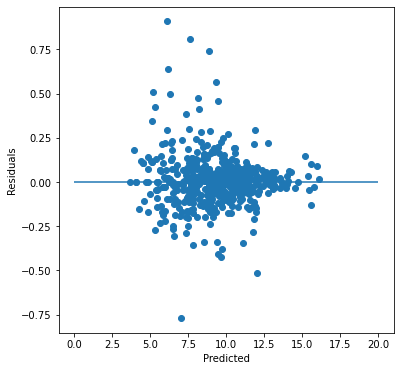

In [ ]:
# Regression
knnr_params=[{"n_neighbors":list(range(1,15))}]
knnr_grid = GridSearchCV(KNeighborsRegressor(), knnr_params, cv=5, n_jobs=-1)
knnr_grid_opt= knnr_grid.fit(X_train, Yr_train)
best_knnr_model = knnr_grid_opt.best_estimator_
best_knnr_pred = best_knnr_model.predict(X_test)
best_knnr_mse = mean_squared_error(Yr_test, best_knnr_pred)
best_logit_r2 = r2_score(Yr_test, best_knnr_pred)

print("Best score = %f, Best number of neighbors = %s" % (1.-knnr_grid_opt.best_score_,knnr_grid_opt.best_params_))

plt.plot(best_knnr_pred,Yr_test-best_knnr_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

#### SVM

In [ ]:
# Support Vector Machine classification
svm_params = {'C': [0.4,0.5,0.6,0.8,1,1.4], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=5)
svm_grid_opt = svm_grid.fit(Xr_train, Yb_train)
best_svm_model = svm_grid_opt.best_estimator_
best_svm_pred = best_svm_model.predict(Xr_test)
best_svm_mse = mean_squared_error(Yb_test, best_svm_pred)
best_svm_r2 = r2_score(Yb_test, best_svm_pred)

print("Best score = %f, Best parameters = %s" % (1.-svm_grid_opt.best_score_,svm_grid_opt.best_params_))


Best score = 0.067133, Best C = {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


Best score = 0.000720, Best C = {'C': 1.4, 'gamma': 'scale', 'kernel': 'linear'}


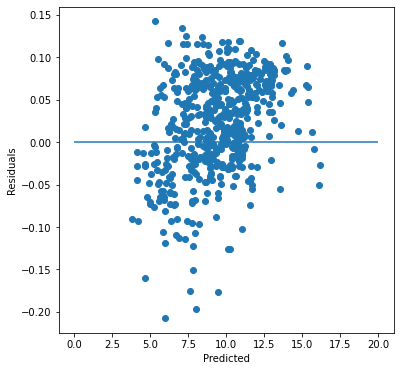

In [ ]:
# SVM regression
svmr_params = {'C': [0.4,0.5,0.6,0.8,1,1.4, 1.8, 2], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']} 
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
svmr_grid = GridSearchCV(SVR(), param_grid=svmr_params, cv=5)
svmr_grid_opt = svmr_grid.fit(Xr_train, Yr_train)
best_svmr_model = svmr_grid_opt.best_estimator_
best_svmr_pred = best_svmr_model.predict(Xr_test)
best_svmr_mse = mean_squared_error(Yr_test, best_svmr_pred)
best_svmr_r2 = r2_score(Yr_test, best_svmr_pred)

print("Best score = %f, Best parameters = %s" % (1.-svmr_grid_opt.best_score_,svmr_grid_opt.best_params_))

plt.plot(best_svmr_pred,Yr_test-best_svmr_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

#### Binary Decision Tree (CART)

In [ ]:
# Decision Tree Classifier
dt_params = {"max_depth":list(range(2,10))} # , 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]
dt_grid = GridSearchCV(DecisionTreeClassifier(),dt_params,cv=5,n_jobs=-1)
dt_grid_opt = dt_grid.fit(Xr_train, Yb_train)
best_dt_model = dt_grid_opt.best_estimator_
best_dt_pred = best_dt_model.predict(Xr_test)
best_dt_mse = mean_squared_error(Yb_test, best_dt_pred)
best_dt_r2 = r2_score(Yb_test, best_dt_pred)


print("Best score = %f, Best parameters = %s" % (1.-dt_grid_opt.best_score_,dt_grid_opt.best_params_))


Best score = 0.003925, Best parameters = {'max_depth': 8}


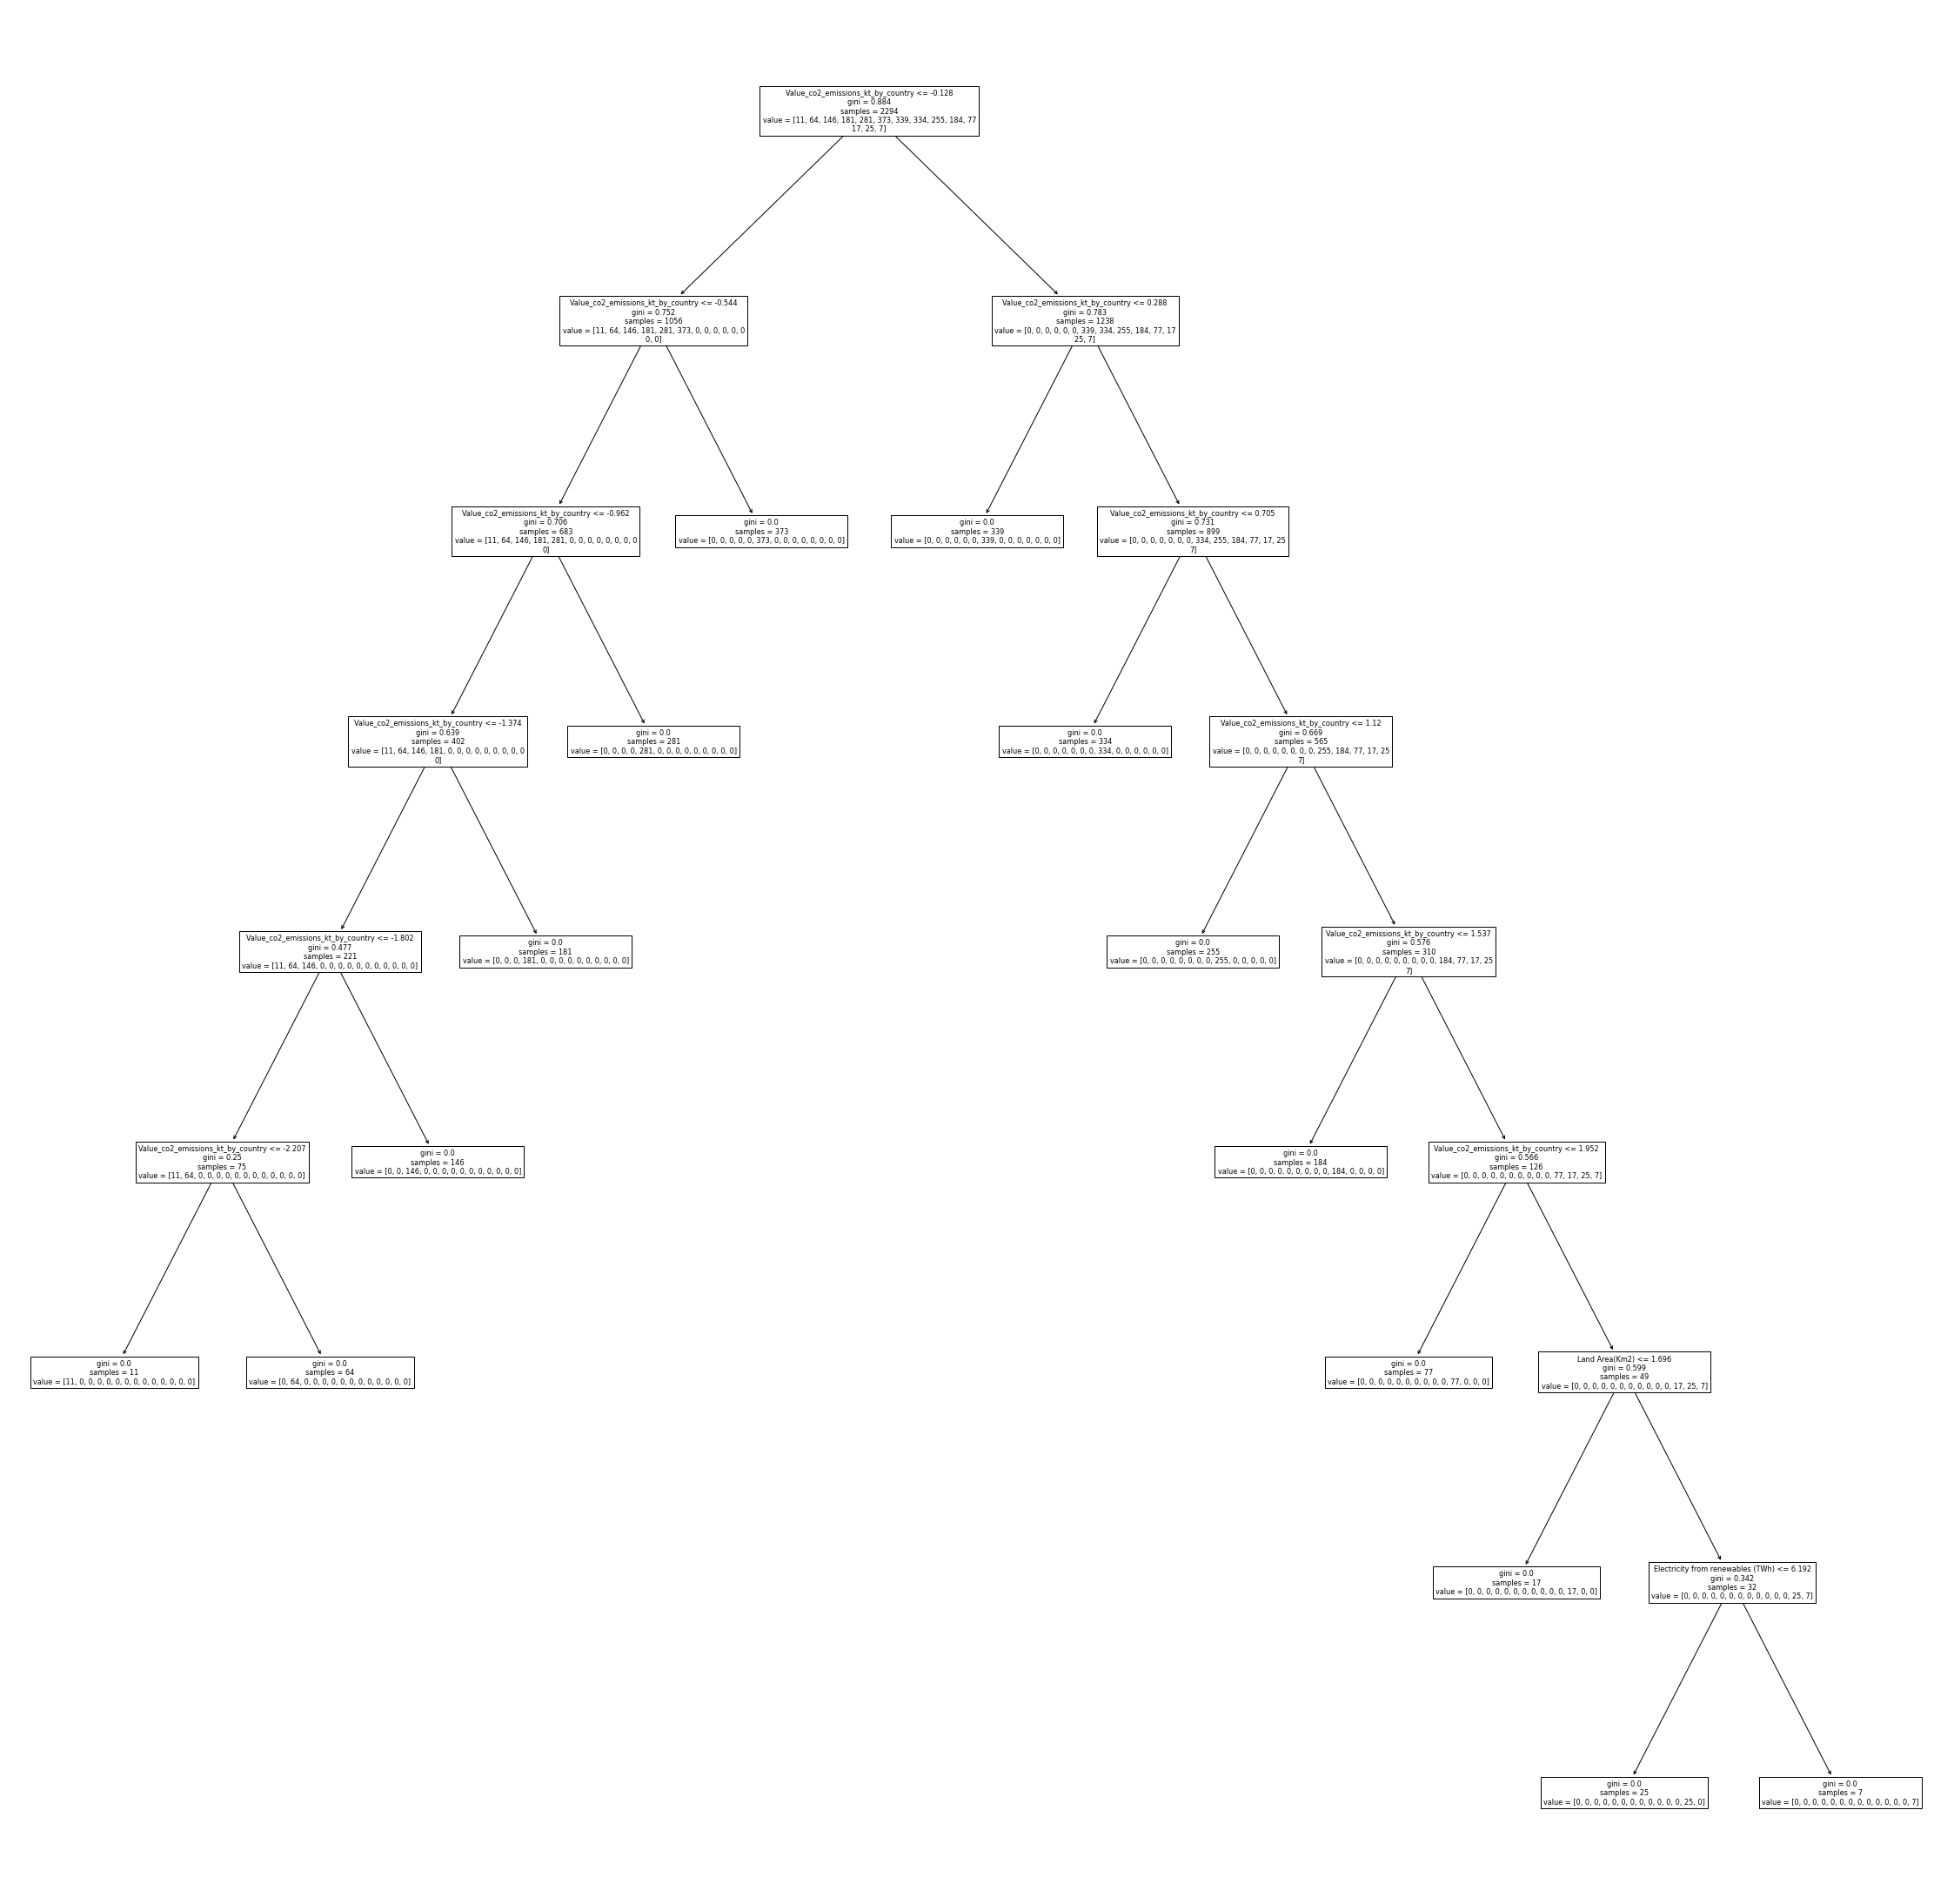

In [ ]:
treeG=DecisionTreeClassifier(max_depth=dt_grid_opt.best_params_['max_depth'])
treeG.fit(Xr_train,Yb_train)
plot_tree(treeG,feature_names=dfC.columns.tolist());
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

Best score = 0.000067, Best parameters = {'max_depth': 18}


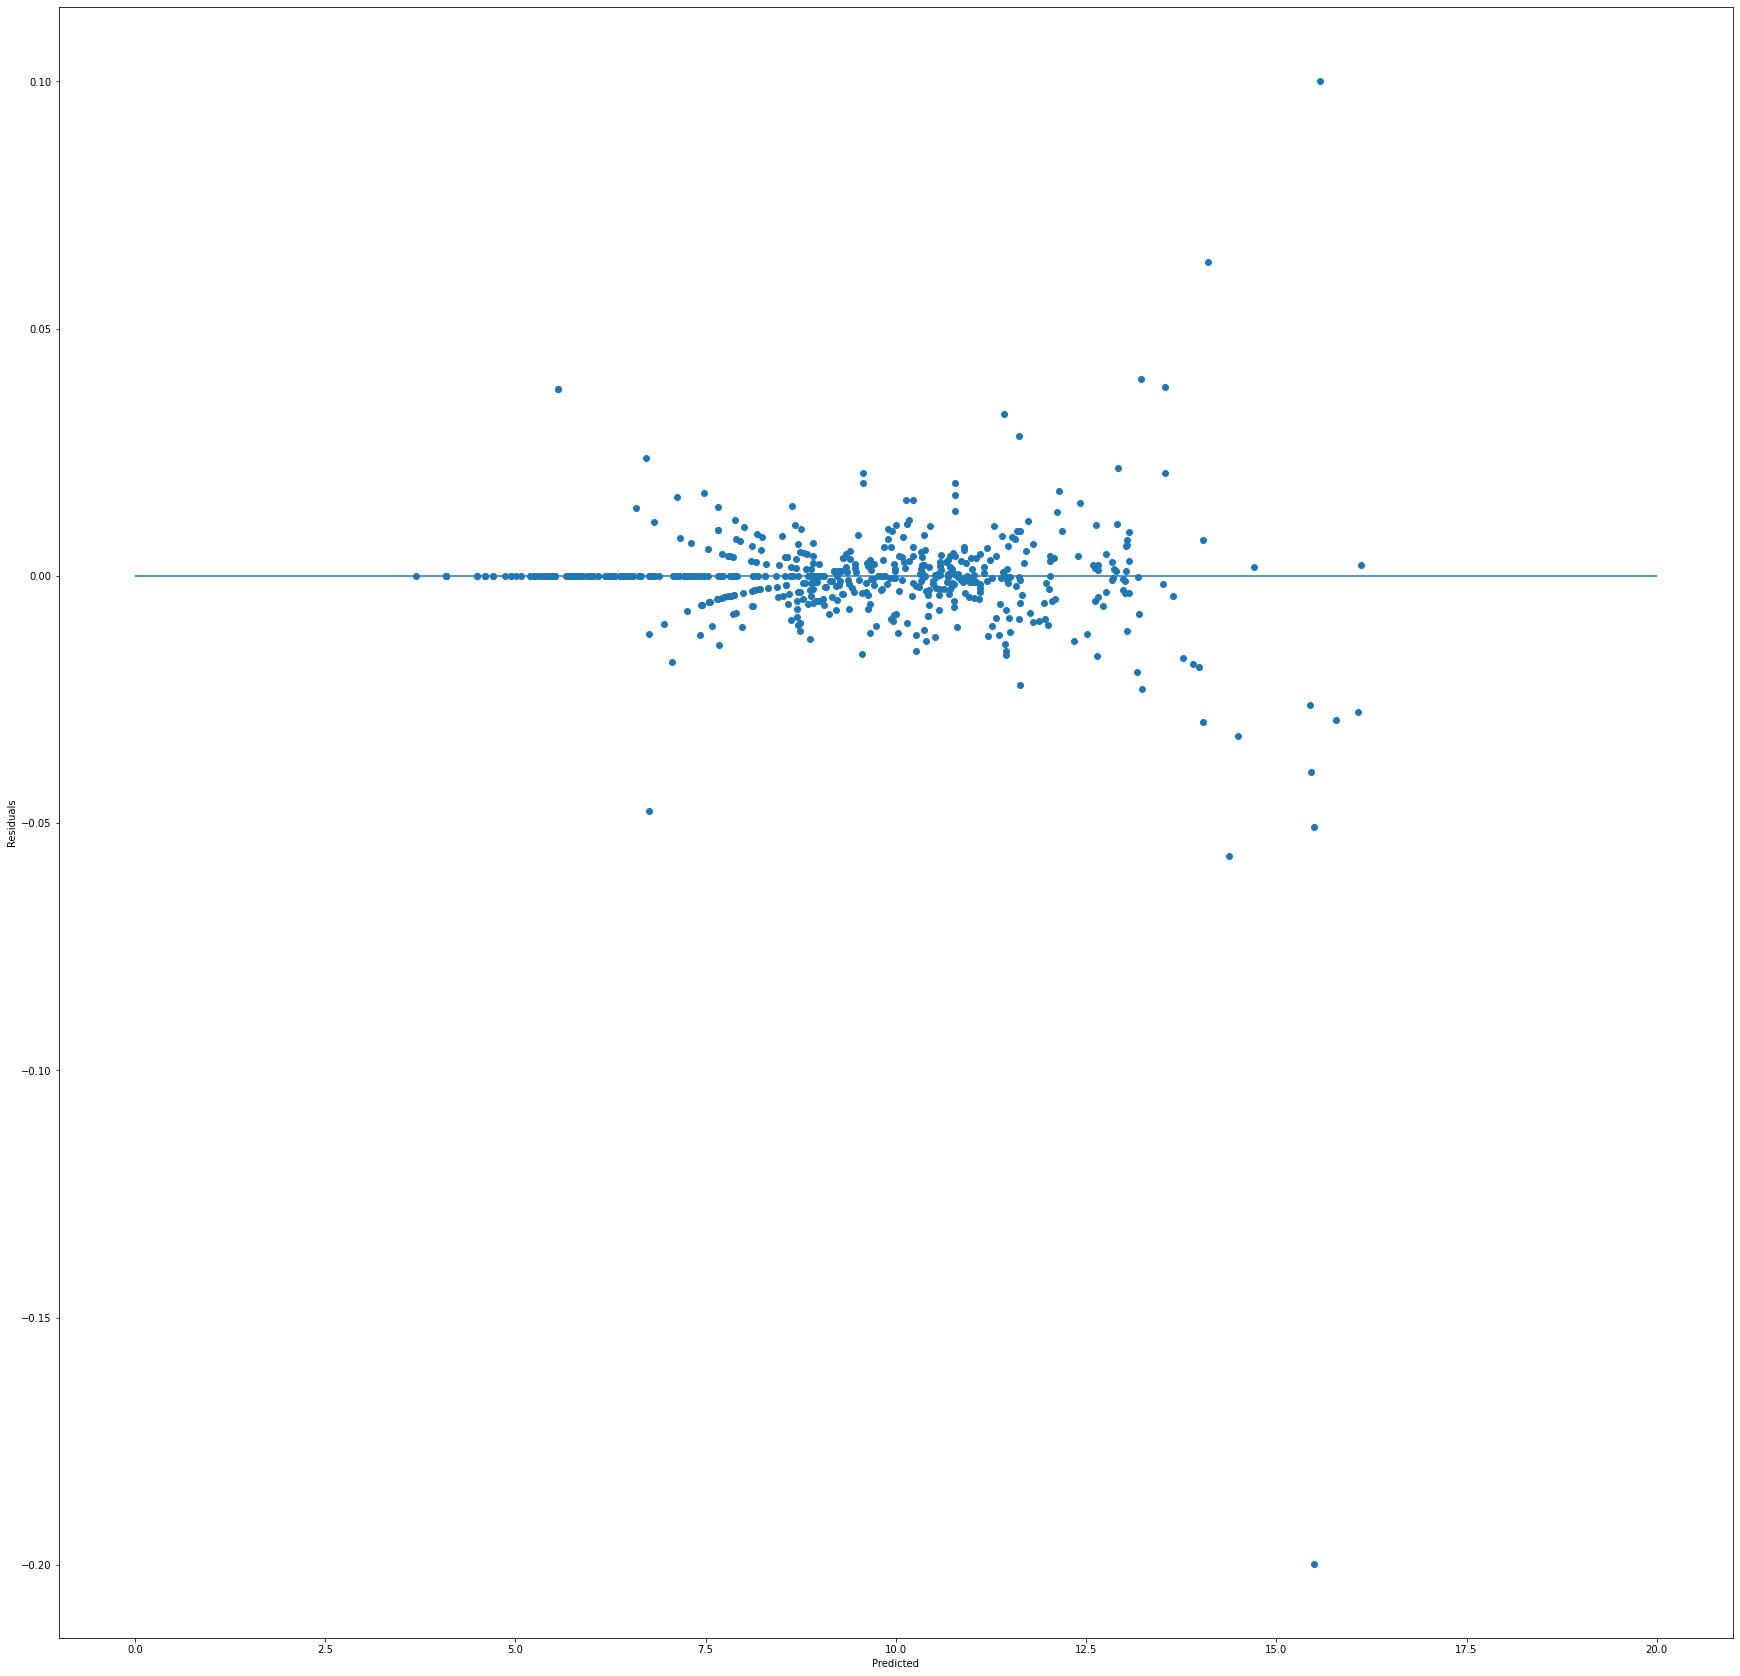

In [ ]:
# Decision Tree Regressor
dtr_params = {"max_depth":list(range(2,20))}  #, 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dtr_grid = GridSearchCV(DecisionTreeRegressor(), param_grid=dtr_params, cv=5)
dtr_grid_opt = dtr_grid.fit(Xr_train, Yr_train)
best_dtr_model = dtr_grid_opt.best_estimator_
best_dtr_pred = best_dtr_model.predict(Xr_test)
best_dtr_mse = mean_squared_error(Yr_test, best_dtr_pred)
best_dtr_r2 = r2_score(Yr_test, best_dtr_pred)

print("Best score = %f, Best parameters = %s" % (1.-dtr_grid_opt.best_score_,dtr_grid_opt.best_params_))

plt.plot(best_dtr_pred,Yr_test-best_dtr_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

#### Random forest

In [ ]:
#rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_params=[{"max_features":list(range(2,10,1))}]
rf_grid =GridSearchCV(RandomForestClassifier(n_estimators=100),
        param_grid = rf_params,cv=5,n_jobs=-1)
rf_grid_opt = rf_grid.fit(Xr_train, Yb_train)
best_rf_model = rf_grid_opt.best_estimator_
best_rf_pred = best_rf_model.predict(Xr_test)
best_rf_mse = mean_squared_error(Yb_test, best_rf_pred)
best_rf_r2 = r2_score(Yb_test, best_rf_pred)

print("Best score = %f, Best parameters = %s" % (1.-rf_grid_opt.best_score_,rf_grid_opt.best_params_))


Best score = 0.040543, Best parameters = {'max_features': 9}


In [ ]:
# Importance of variables in the model
rf= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Yb_train)
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(dfC.columns[indices[f]]," : ", importances[indices[f]])

Value_co2_emissions_kt_by_country  :  0.10390627336385945
Electricity from fossil fuels (TWh)  :  0.07662874894476833
Renewable energy share in the total final energy consumption (%)  :  0.04705859891644721
Electricity from renewables (TWh)  :  0.04698157288115727
Land Area(Km2)  :  0.04495662511566779
Primary energy consumption per capita (kWh/person)  :  0.04456089303115591
gdp_per_capita  :  0.04127550376371814
Energy intensity level of primary energy (MJ/$2017 PPP GDP)  :  0.03908176410932458
Low-carbon electricity (% electricity)  :  0.03851462505192876
Latitude  :  0.03764870596639768
Access to electricity (% of population)  :  0.03579205931907138
Density.n.P.Km2.  :  0.034707513264987847
Access to clean fuels for cooking  :  0.03432886929628583
Longitude  :  0.03356279786178316
gdp_growth  :  0.027103554988237293
Electricity from nuclear (TWh)  :  0.01829708346749791
Entity_United States  :  0.003682692282127048
Entity_Thailand  :  0.0034010343689300014
Entity_Austria  :  0.0032

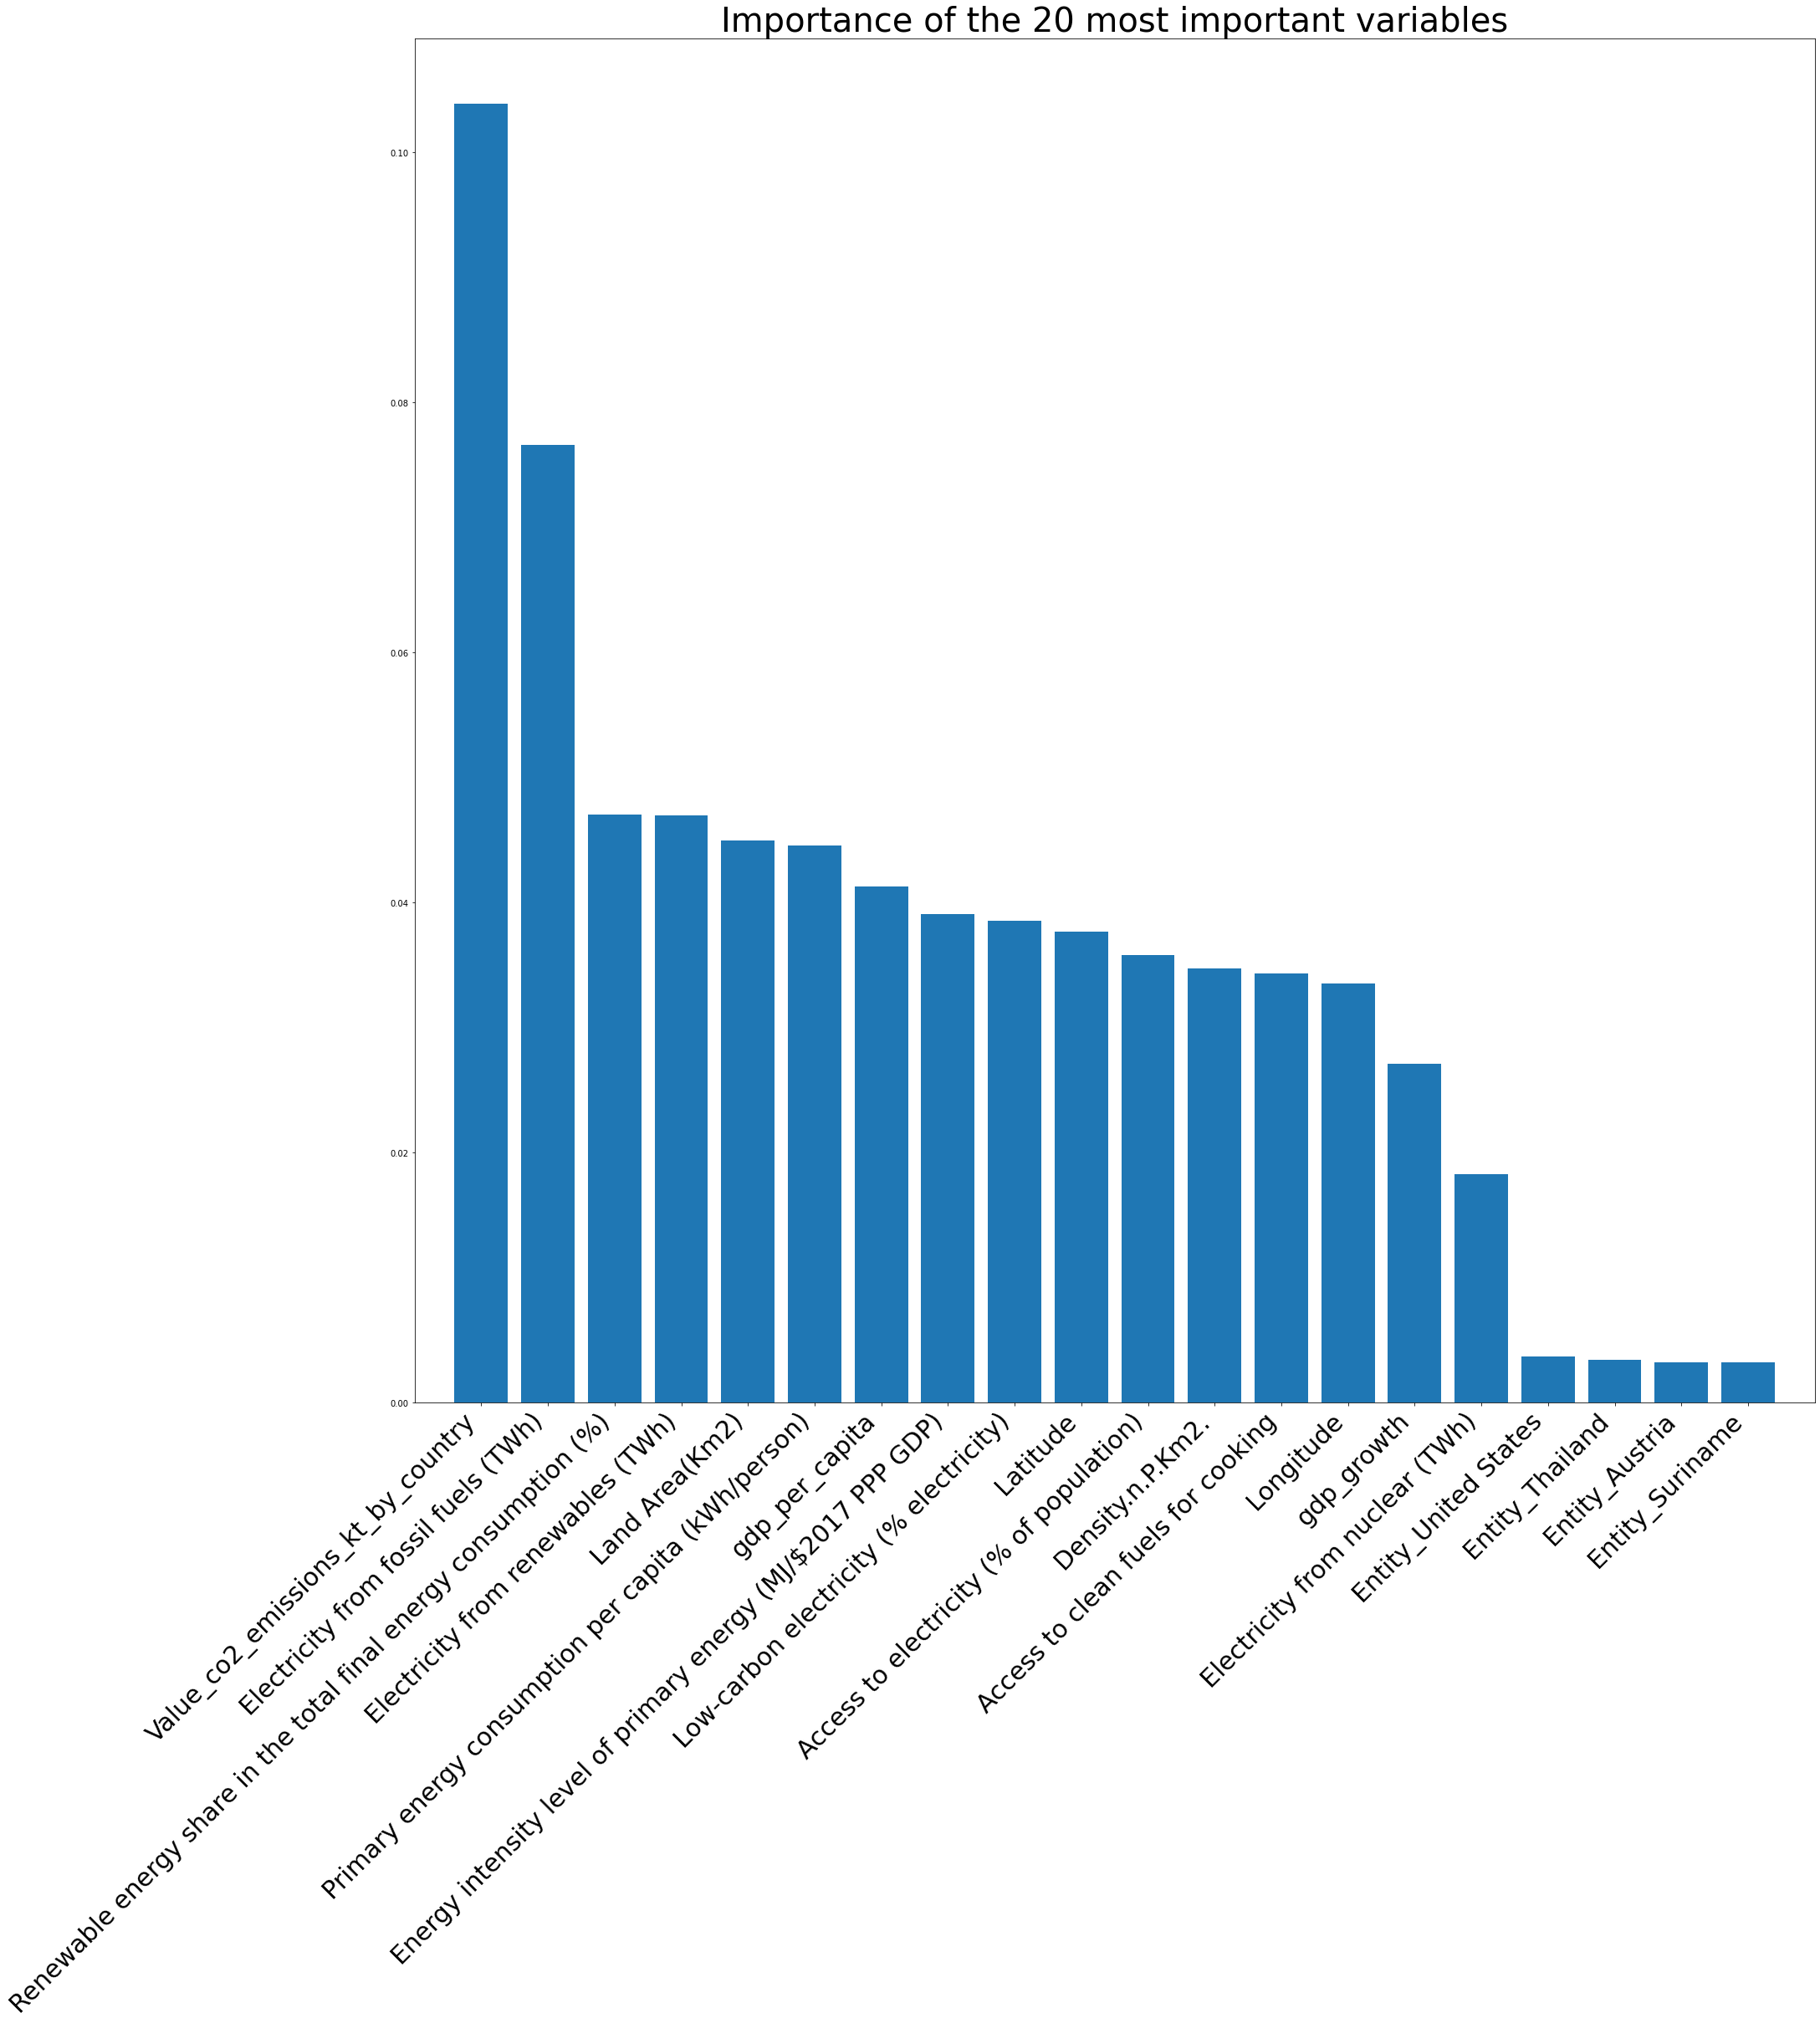

In [ ]:
plt.figure()
plt.title("Importance of variables")
plt.bar(range(Xr_train.shape[1])[:20], importances[indices][:20])
plt.xticks(range(Xr_train.shape[1])[:20], dfC.columns[indices][:20], rotation=45, ha='right', fontsize =30)  
plt.xlim([-1,20])
plt.title("Importance of the 20 most important variables", fontsize =40)
plt.show()

Best score = 0.004820, Best parameters = {'max_features': 9}


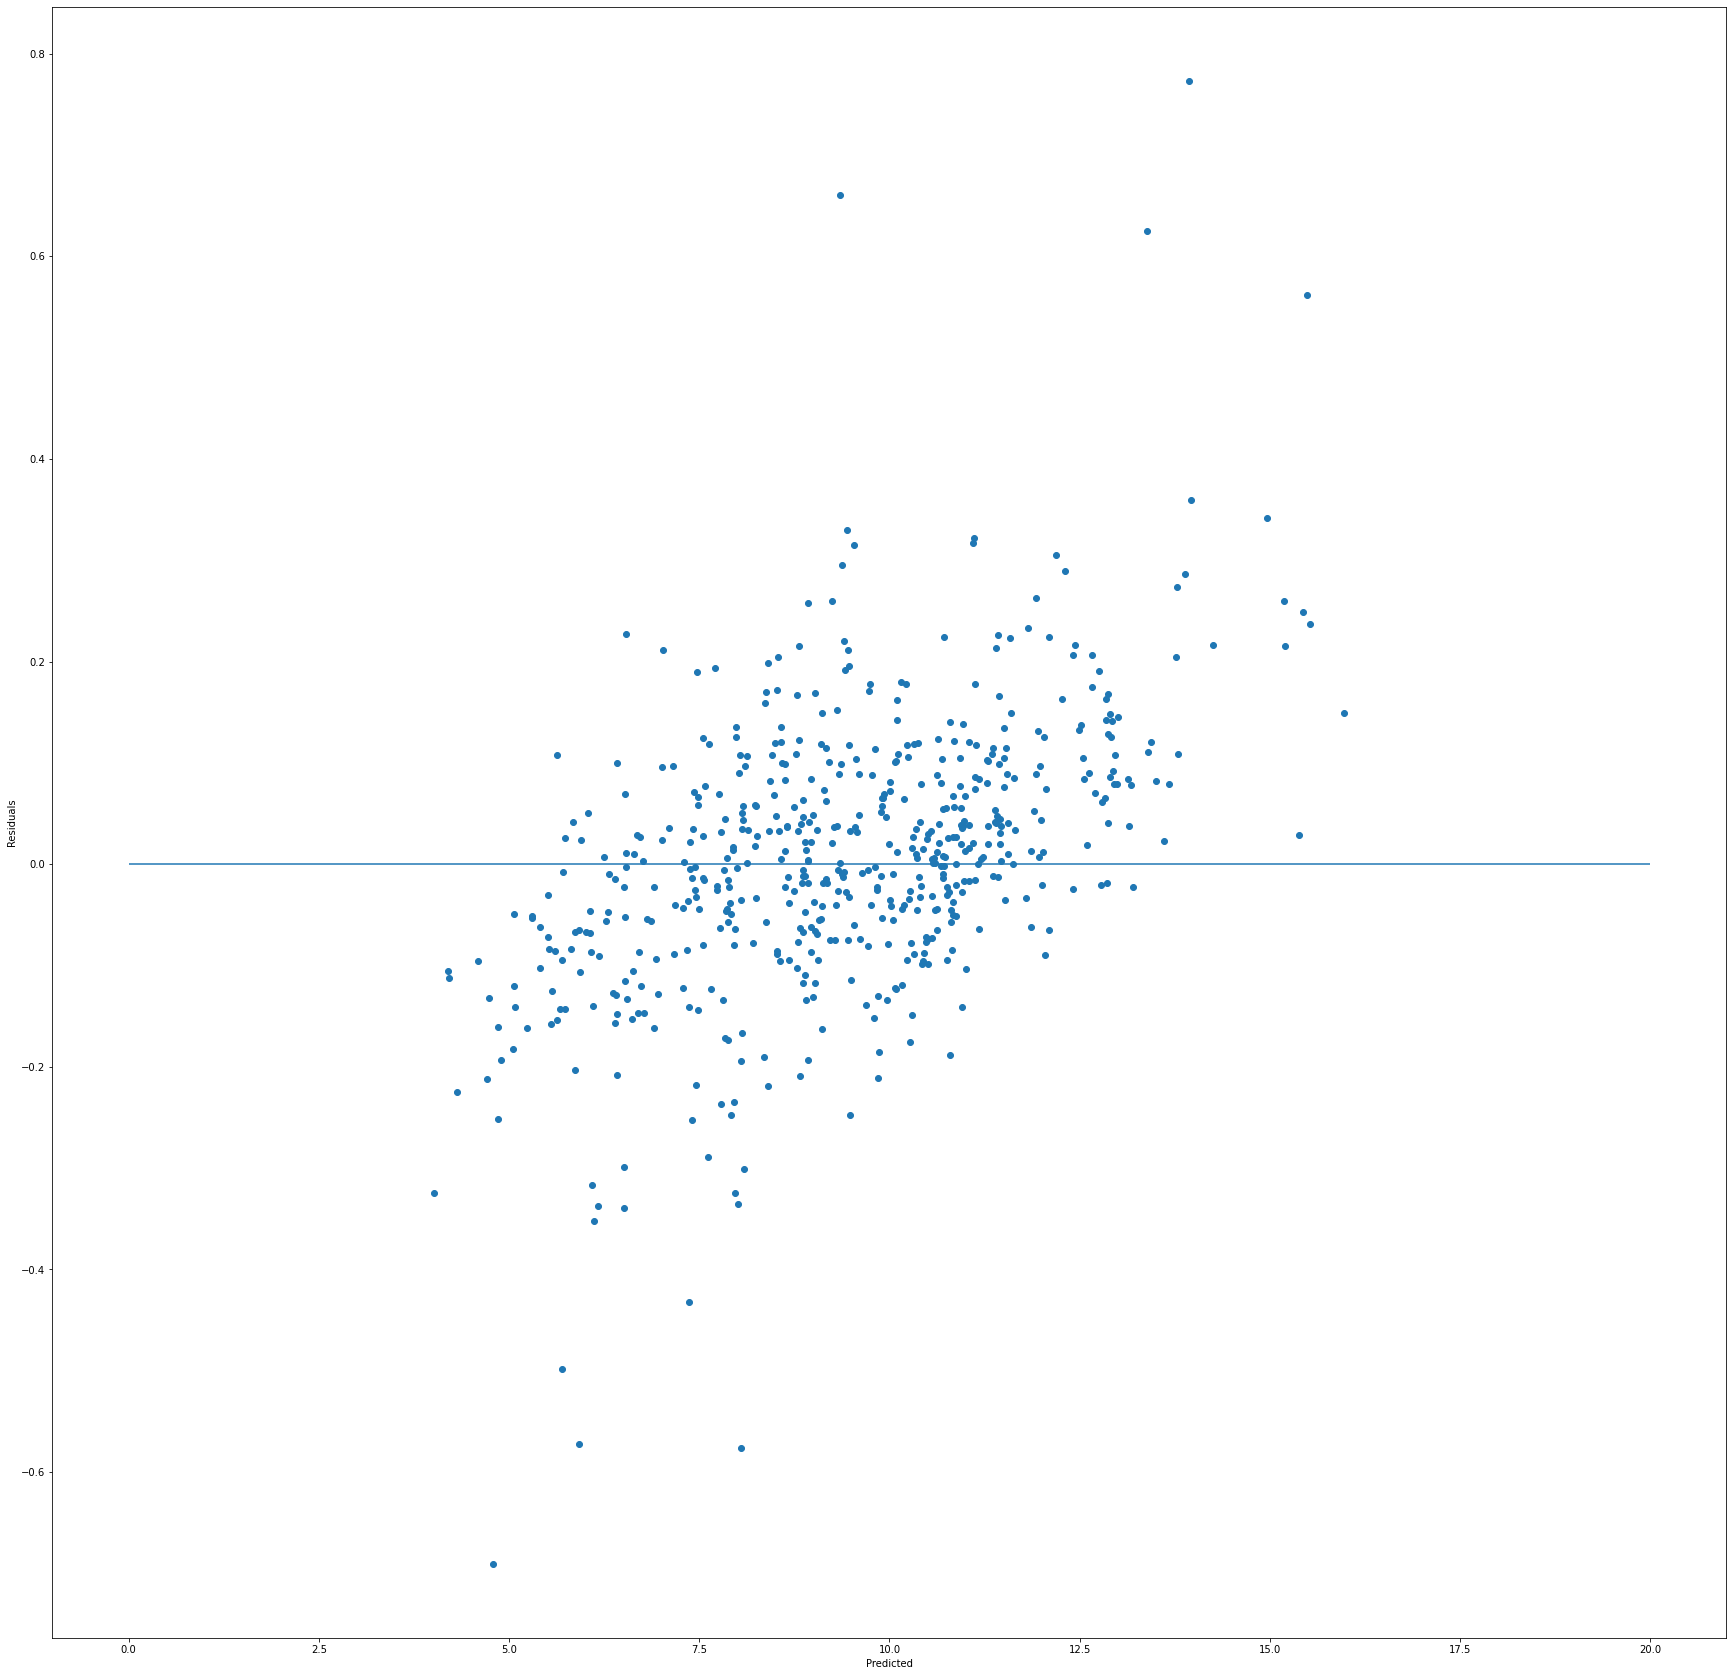

In [ ]:
rfr_params =[{"max_features":list(range(2,10,1))}]
rfr_grid = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params, cv=5)
rfr_grid_opt=rfr_grid.fit(Xr_train, Yr_train)
best_rfr_model = rfr_grid.best_estimator_
best_rfr_pred = best_rfr_model.predict(Xr_test)
best_rfr_mse = mean_squared_error(Yr_test, best_rfr_pred)
best_rfr_r2 = r2_score(Yr_test, best_rfr_pred)

print("Best score = %f, Best parameters = %s" % (1.-rfr_grid_opt.best_score_,rfr_grid_opt.best_params_))

plt.plot(best_rfr_pred,Yr_test-best_rfr_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

#### Boosting

In [ ]:
gbr_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
gbr_grid = GridSearchCV(GradientBoostingRegressor(), param_grid=gbr_params, cv=5)
gbr_grid_opt = gbr_grid.fit(Xr_train, Yr_train)
best_gbr_model = gbr_grid_opt.best_estimator_
best_gbr_pred = best_gbr_model.predict(Xr_test)
best_gbr_mse = mean_squared_error(Yr_test, best_gbr_pred)
best_gbr_r2 = r2_score(Yr_test, best_gbr_pred)

print("Best score = %f, Best parameters = %s" % (1.-gbr_grid_opt.best_score_,gbr_grid_opt.best_params_))

plt.plot(best_gbr_pred,Yr_test-best_gbr_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

Best score = 0.000018, Best parameters = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


#### Neural networks

In [ ]:
nn_params = [{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nn_grid = GridSearchCV(MLPClassifier(max_iter=500),nn_params,cv=10,n_jobs=-1)
nn_grid_opt = nn_grid.fit(Xr_train, Yb_train)
best_nn_model = nn_grid_opt.best_estimator_
best_nn_pred = best_nn_model.predict(Xr_test)
best_nn_mse = mean_squared_error(Yb_test, best_nn_pred)
best_nn_r2 = r2_score(Yb_test, best_nn_pred)

print("Best score = %f, Best parameters = %s" % (1.-nn_grid_opt.best_score_,nn_grid_opt.best_params_))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization 

Best score = 0.136884, Best parameters = {'hidden_layer_sizes': (8,)}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Best score = 0.238492, Best parameters = {'hidden_layer_sizes': (7,)}


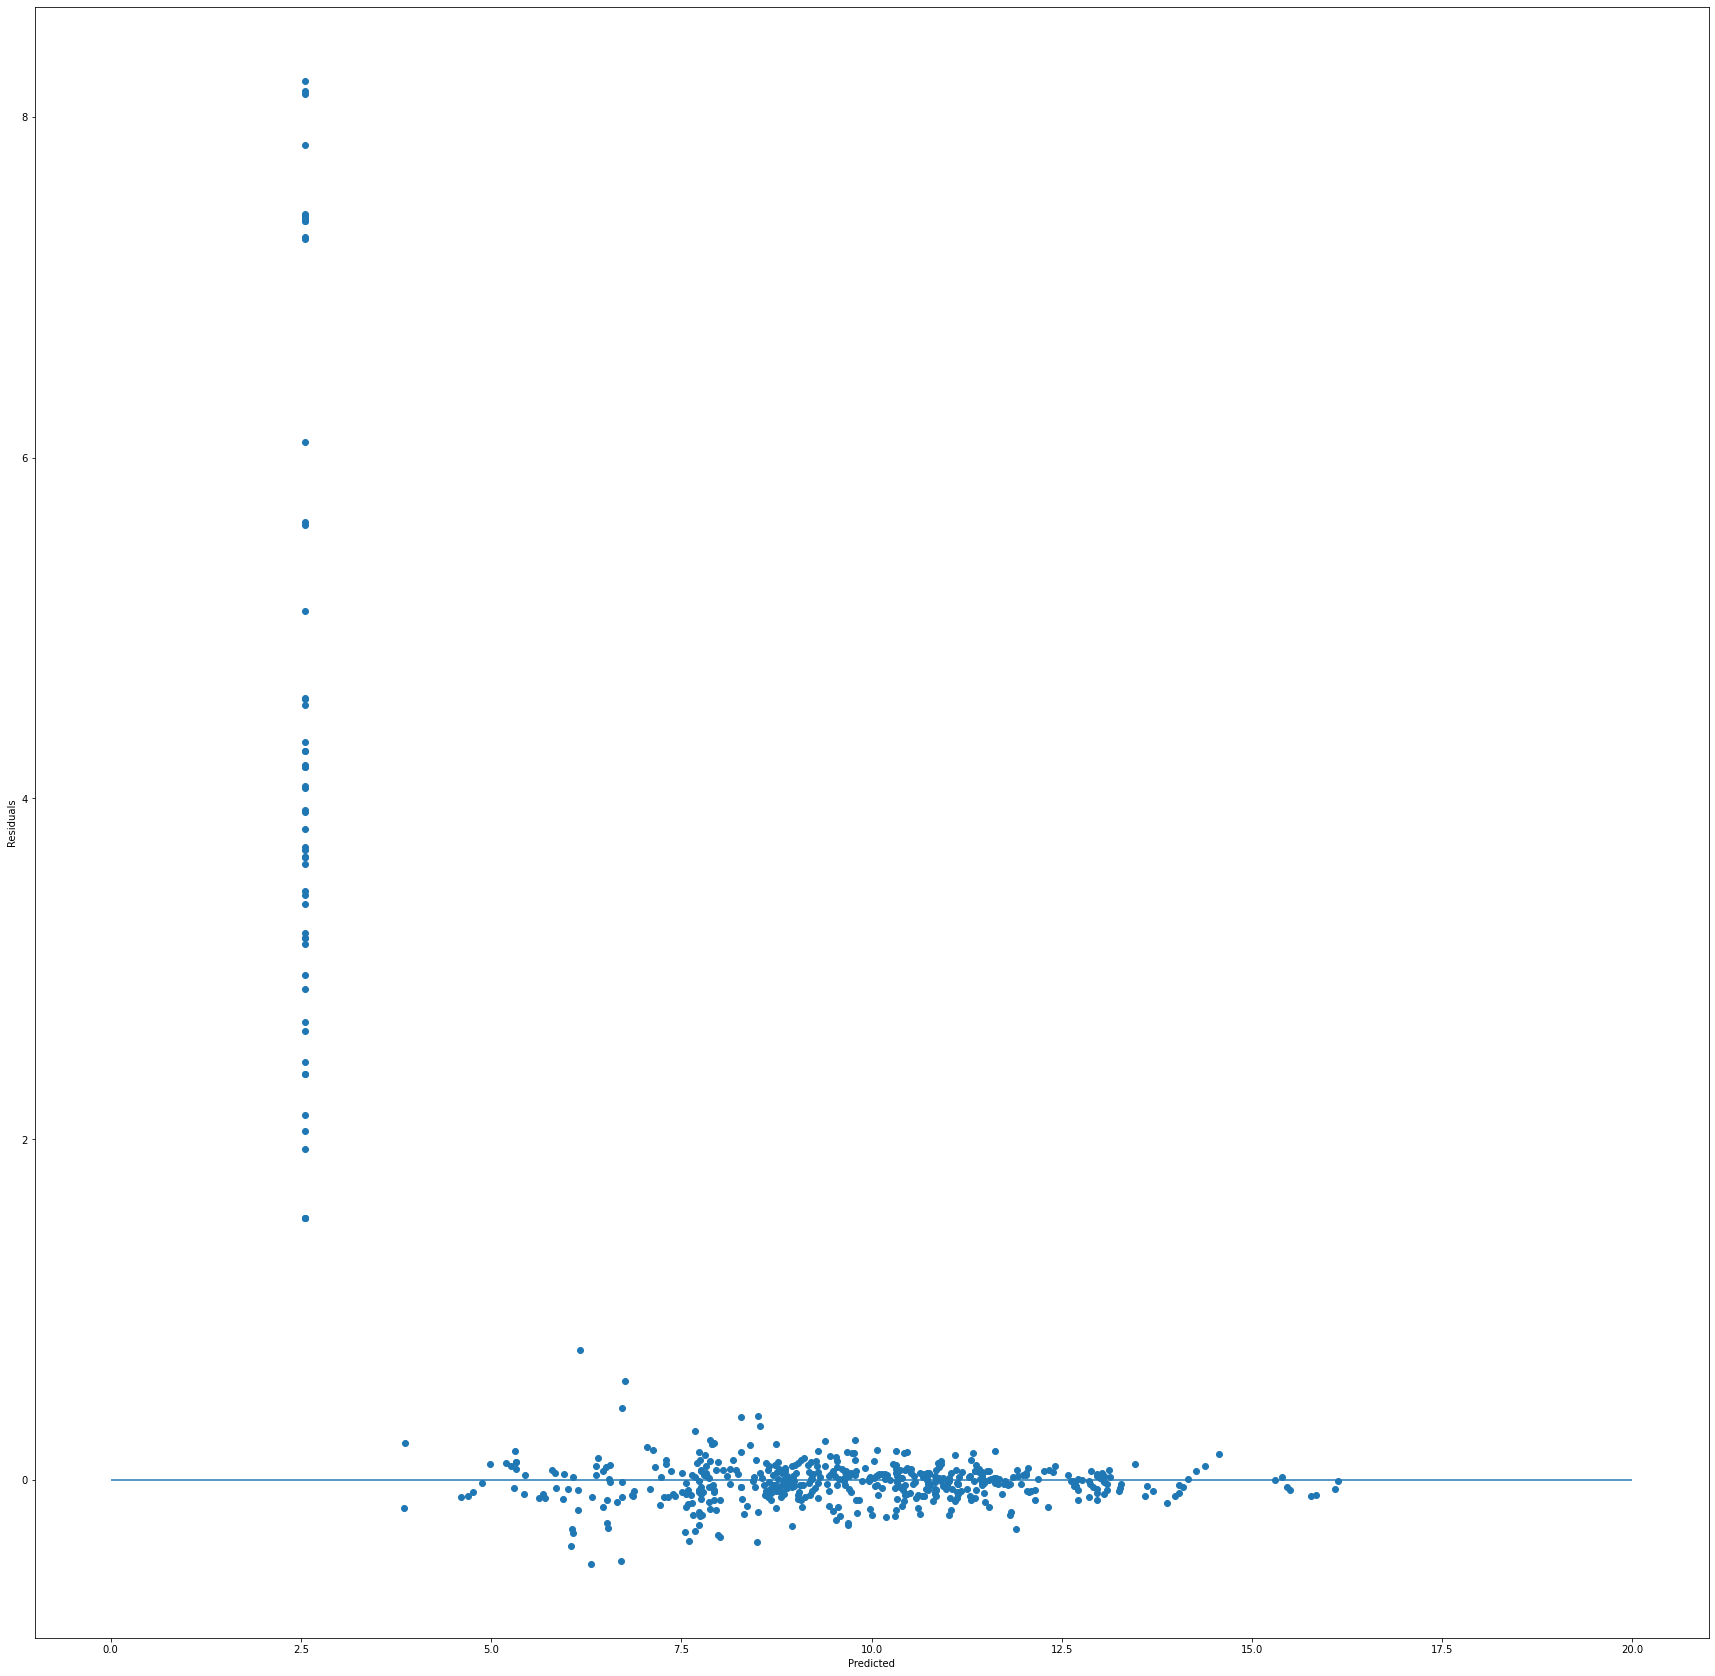

In [ ]:
nnr_params = [{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nnr_grid = GridSearchCV(MLPRegressor(max_iter=500),nnr_params,cv=10,n_jobs=-1)
nnr_grid_opt = nnr_grid.fit(Xr_train, Yr_train)
best_nnr_model = nnr_grid_opt.best_estimator_
best_nnr_pred = best_nnr_model.predict(Xr_test)
best_nnr_mse = mean_squared_error(Yr_test, best_nnr_pred)
best_nnr_r2 = r2_score(Yr_test, best_nnr_pred)

print("Best score = %f, Best parameters = %s" % (1.-nnr_grid_opt.best_score_,nnr_grid_opt.best_params_))

plt.plot(best_nnr_pred,Yr_test-best_nnr_pred,"o")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.hlines(0,0,20)
plt.show()

### Question 3

Compare the different optimized models on your test sample. Which models perform best? How accurate
are they?

Regression models: 

In [ ]:
print("Mean Squared Error for the regression models:")
print("Ridge: ", best_ridge_mse)
print("Lasso: ", best_lasso_mse)
print("Support Vector Machine model: ", best_svmr_mse)
print("Optimal tree model: ", best_dtr_mse)
print("Random forest model: ", best_rfr_mse)
print("Boosting model: ", best_gbr_mse)
print("Neural network model: ", best_nnr_mse)


Mean Squared Error for the regression models:
Ridge:  9.131370485978729e-07
Lasso:  0.002310867675934437
Support Vector Machine model:  0.003817731640908033
Optimal tree model:  0.00015567821603519914
Random forest model:  0.019671034660856304
Boosting model:  9.75077453250866e-05
Neural network model:  2.1758360344825745


In [ ]:
print("R2 for the regression models:")
print("Ridge: ", best_ridge_r2)
print("Lasso: ", best_lasso_r2)
print("Support Vector Machine model: ", best_svmr_r2)
print("Optimal tree model: ", best_dtr_r2)
print("Random forest model: ", best_rfr_r2)
print("Boosting model: ", best_gbr_r2)
print("Neural network model: ", best_nnr_r2)

Root Mean Square Error for the regression models:
Ridge:  0.9999998284586875
Lasso:  0.999565881950895
Support Vector Machine model:  0.9992828034987822
Optimal tree model:  0.9999684892842373
Random forest model:  0.9963046126440819
Boosting model:  0.9999816822604712
Neural network model:  0.5912489043406542


Classification models : 

In [ ]:
print("Mean Squared Error for the classification models:")
print("Support Vector Machine model: ", best_svm_mse)
print("Optimal tree model: ", best_dt_mse)
print("Random forest model: ", best_rf_mse)
#print("Boosting model: ", best_gb_mse)
print("Neural network model: ", best_nn_mse)

Mean Squared Error for the classification models:
Support Vector Machine model:  0.06794425087108014
Optimal tree model:  0.0017421602787456446
Random forest model:  0.02264808362369338
Neural network model:  0.6114982578397212


In [ ]:
print("R2 for the classification models:")
print("Support Vector Machine model: ", best_svm_r2)
print("Optimal tree model: ", best_dt_r2)
print("Random forest model: ", best_rf_r2)
#print("Boosting model: ", best_gb_r2)
print("Neural network model: ", best_nn_r2)

R2 for the classification models:
Support Vector Machine model:  0.9876054198189259
Optimal tree model:  1.0
Random forest model:  0.9958684732729753
Neural network model:  0.8884487783703336


### Question 4

Interpretation and feedback on data analysis: are your results consistent with the exploratory data analysis, for example in terms of the importance of variables?

In [ ]:
# TODO 

### Question 5

In a second step, you can use an algorithm to fill in the missing values and repeat the modeling (for the
algorithms that have proved most successful) with the completed dataset.

In [ ]:
# Importing data with missing values

naData = pd.read_csv(path + "global-data-on-sustainable-energy (1).csv")

naData['Entity'] = naData['Entity'].astype('category')
naData['Year'] = naData['Year'].astype('category')
naData.rename(columns={'Density\\n(P/Km2)': 'Density.n.P.Km2.'}, inplace=True)
naData['Density.n.P.Km2.'] = pd.to_numeric(naData['Density.n.P.Km2.'].str.replace(',', '.'))

In [ ]:
#  !! transforming gives inf values, which does not work wit the missForest func
# still transform in another way ??

'''
# Transformation des donnees - sqrt / log ??
#Transformation of variables
#WARNING: Only run ONCE!!
naData['Access to electricity (% of population)'] = np.sqrt(naData['Access to electricity (% of population)'])
naData["Access to clean fuels for cooking"] = np.sqrt(naData["Access to clean fuels for cooking"])
naData['Electricity from fossil fuels (TWh)'] = np.sqrt(naData['Electricity from fossil fuels (TWh)'])
naData["Electricity from nuclear (TWh)"] = np.sqrt(naData["Electricity from nuclear (TWh)"])
naData["Electricity from renewables (TWh)"] = np.sqrt(naData["Electricity from renewables (TWh)"])
naData["Value_co2_emissions_kt_by_country"] = np.log(naData["Value_co2_emissions_kt_by_country"])
#naData["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"] = np.log(naData["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"])
naData["Primary energy consumption per capita (kWh/person)"] = np.log(naData["Primary energy consumption per capita (kWh/person)"])
naData["gdp_per_capita"] = np.log(naData["gdp_per_capita"])
naData["Land Area(Km2)"] = np.log(naData["Land Area(Km2)"])
'''

'\n# Transformation des donnees - sqrt / log ??\n#Transformation of variables\n#WARNING: Only run ONCE!!\nnaData[\'Access to electricity (% of population)\'] = np.sqrt(naData[\'Access to electricity (% of population)\'])\nnaData["Access to clean fuels for cooking"] = np.sqrt(naData["Access to clean fuels for cooking"])\nnaData[\'Electricity from fossil fuels (TWh)\'] = np.sqrt(naData[\'Electricity from fossil fuels (TWh)\'])\nnaData["Electricity from nuclear (TWh)"] = np.sqrt(naData["Electricity from nuclear (TWh)"])\nnaData["Electricity from renewables (TWh)"] = np.sqrt(naData["Electricity from renewables (TWh)"])\nnaData["Value_co2_emissions_kt_by_country"] = np.log(naData["Value_co2_emissions_kt_by_country"])\n#naData["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"] = np.log(naData["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"])\nnaData["Primary energy consumption per capita (kWh/person)"] = np.log(naData["Primary energy consumption per capita (kWh/pers

In [ ]:
# Variables explicatives
naDataDum=pd.get_dummies(naData[["Entity","Year"]], drop_first=True)

naDataQuant=naData[['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Density.n.P.Km2.',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']]
na_dfC=pd.concat([naDataDum,naDataQuant],axis=1)
na_dfC.head()

Entity_Albania  Entity_Algeria  Entity_Angola  Entity_Antigua and Barbuda  \
0               0               0              0                           0   
1               0               0              0                           0   
2               0               0              0                           0   
3               0               0              0                           0   
4               0               0              0                           0   

   Entity_Argentina  Entity_Armenia  Entity_Aruba  Entity_Australia  \
0                 0               0             0                 0   
1                 0               0             0                 0   
2                 0               0             0                 0   
3                 0               0             0                 0   
4                 0               0             0                 0   

   Entity_Austria  Entity_Azerbaijan  ...  \
0               0                  0  ...   
1               0                  0  ...   
2               0                  0  ...   
3               0                  0  ...   
4               0                  0  ...   

   Low-carbon electricity (% electricity)  \
0                               65.957440   
1                               84.745766   
2                               81.159424   
3                               67.021280   
4                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                         760.000000         NaN             NaN   
1                         730.000000         NaN             NaN   
2                        1029.999971         NaN      179.426579   
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   

   Density.n.P.Km2.  Land Area(Km2)  Latitude  Longitude  
0              60.0        652230.0  33.93911  67.709953  
1              60.0        652230.0  33.93911  67.709953  
2              60.0        652230.0  33.93911  67.709953  
3              60.0        652230.0  33.93911  67.709953  
4              60.0        652230.0  33.93911  67.709953  

[5 rows x 211 columns]

#### Reminder of the amount of missing data ( maybe another title hehe )

In [ ]:
nrows = len(naDataQuant)
missing_rates = 1-naDataQuant.count(axis=0)/nrows
missing_rates

Access to electricity (% of population)                             0.002740
Access to clean fuels for cooking                                   0.046314
Renewable energy share in the total final energy consumption (%)    0.053165
Electricity from fossil fuels (TWh)                                 0.005755
Electricity from nuclear (TWh)                                      0.034530
Electricity from renewables (TWh)                                   0.005755
Low-carbon electricity (% electricity)                              0.011510
Primary energy consumption per capita (kWh/person)                  0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.056728
Value_co2_emissions_kt_by_country                                   0.117292
gdp_growth                                                          0.086873
gdp_per_capita                                                      0.077281
Density.n.P.Km2.                                                    0.000274

<AxesSubplot:>

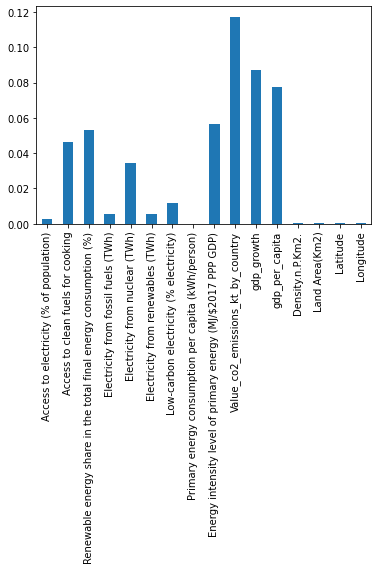

In [ ]:
missing_rates.plot.bar()

Value_co2_emissions_kt_by_country has the highest amount of missing data, this is also the variable we are seaking to predict.

#### Imputation using missForest

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
# naDataQuant.astype('float64')
np.sum(np.sum(np.isinf(naDataQuant)))

0

In [ ]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
data_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=300).fit_transform(na_dfC)

KeyboardInterrupt: 

In [ ]:
data_rfImp=pd.DataFrame(data_rf, columns=naDataQuant.columns)
# data after imputation
data_rfImp.head()

In [ ]:
# data with nan
naDataQuant.head()

In [ ]:
# data with removed nan
dataQuant.head()

#### Prevision with imputated data

In [ ]:
# using the best method found above 

##### Comparison to prevision with data used originally